In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pokemon = pd.read_csv('pokemon.csv')
combats = pd.read_csv('combats.csv')
tests = pd.read_csv('tests.csv')
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


# pokemon.csv

In [266]:
# fill in NaN data
pokemon['Type 2'] = pokemon['Type 2'].fillna('None')
pokemon['Name'] = pokemon['Name'].fillna('Primeape')
pokemon['Type 1'] = pokemon['Type 1'].replace('Fight', 'Fighting')
pokemon['Type 2'] = pokemon['Type 2'].replace('Fight', 'Fighting')

In [267]:
# calculate the sum stats
pokemon['stats_sum'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense'] + pokemon['Sp. Atk']\
                       + pokemon['Sp. Def'] + pokemon['Speed']

# generation and legendary or not have no influence on Pokemon battle 
pokemon = pokemon.drop(['Generation','Legendary'],axis = 1) 
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,stats_sum
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,625
4,5,Charmander,Fire,None,39,52,43,60,50,65,309


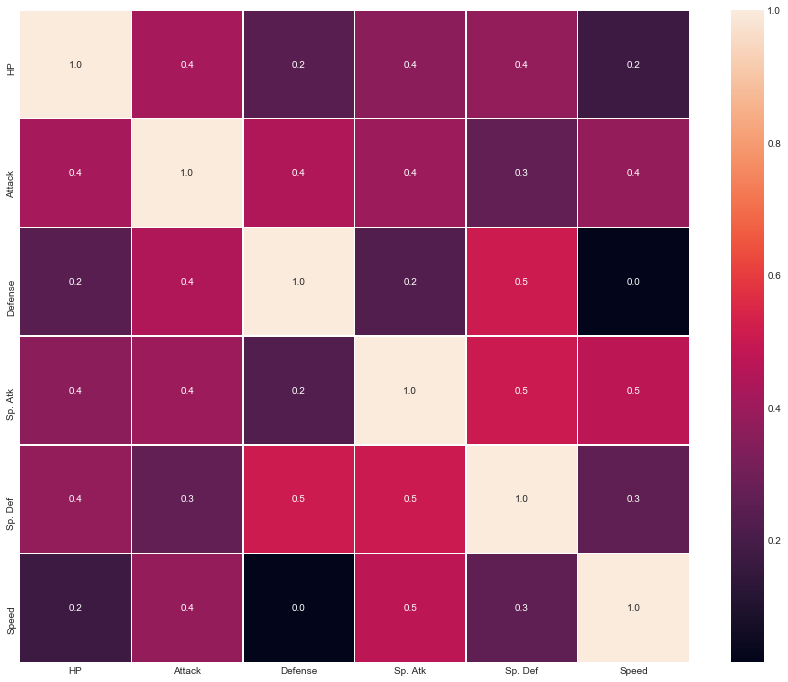

In [268]:
pokemon1 = pokemon.drop(['stats_sum','#'],axis = 1)
f,ax = plt.subplots(figsize=(15,12))
sns.heatmap(pokemon1.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)

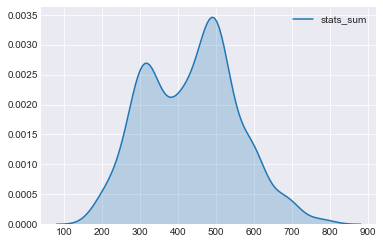

In [269]:
sns.set_style("darkgrid")
sns.kdeplot(pokemon["stats_sum"],shade = True)
plt.show()

In [270]:
#print 10 highest stats_sum pokemons
sorted_pokemon_df = pokemon.sort_values(by='stats_sum',ascending = False)
print(sorted_pokemon_df[['Name','stats_sum']].head(10))

                    Name  stats_sum
426        Mega Rayquaza        780
164        Mega Mewtwo Y        780
163        Mega Mewtwo X        780
422        Primal Kyogre        770
424       Primal Groudon        770
552               Arceus        720
712  Kyurem White Kyurem        700
711  Kyurem Black Kyurem        700
409       Mega Salamence        700
413       Mega Metagross        700


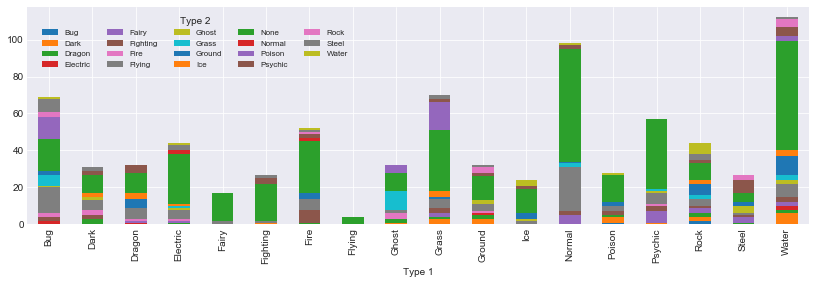

In [271]:
type_cross = pd.crosstab(pokemon["Type 1"], pokemon["Type 2"])
type_cross.plot.bar(stacked=True, figsize=(14,4))
plt.legend(bbox_to_anchor=(0.01,0.99), loc='upper left', ncol=5, fontsize=8, title="Type 2")
plt.show()

In [272]:
# type chart

Normal = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 0.5, "Ghost": 0, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Fighting = {"Normal": 2, "Fighting": 1, "Poison": 0.5, "Ground": 1, "Flying": 0.5, "Bug": 0.5, "Rock": 2, "Ghost": 0, "Steel": 2, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 2, "Psychic": 0.5, "Dragon": 1, "Dark": 2, "Fairy": 0.5}
Poison = {"Normal": 1, "Fighting": 1, "Poison": 0.5, "Ground": 0.5, "Flying": 1, "Bug": 1, "Rock": 0.5, "Ghost": 0.5, "Steel": 0, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 2, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 2}
Ground = {"Normal": 1, "Fighting": 1, "Poison": 2, "Ground": 1, "Flying": 0, "Bug": 0.5, "Rock": 2, "Ghost": 1, "Steel": 2, "Fire": 2, "Water": 1, "Electric": 2, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Flying = {"Normal": 1, "Fighting": 2, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 2, "Rock": 0.5, "Ghost": 1, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 0.5, "Grass": 2, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy":1}
Bug = {"Normal": 1, "Fighting": 0.5, "Poison": 0.5, "Ground": 1, "Flying": 0.5, "Bug": 1, "Rock": 1, "Ghost": 0.5, "Steel": 0.5, "Fire": 0.5, "Water": 1, "Electric": 1, "Grass": 2, "Ice": 1, "Psychic": 2, "Dragon": 1, "Dark": 2, "Fairy": 0.5}
Rock = {"Normal": 1, "Fighting": 0.5, "Poison": 1, "Ground": 0.5, "Flying": 2, "Bug": 2, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 2, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 2, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Ghost = {"Normal": 0, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 2, "Steel": 1, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 2, "Dragon": 1, "Dark": 0.5, "Fairy": 1}
Steel = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 2, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 0.5, "Electric": 0.5, "Grass": 1, "Ice": 2, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 2}
Fire = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 2, "Rock": 0.5, "Ghost": 1, "Steel": 2, "Fire": 0.5, "Water": 0.5, "Electric": 1, "Grass": 2, "Ice": 2, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Water = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 2, "Flying": 1, "Bug": 1, "Rock": 2, "Ghost": 1, "Steel": 1, "Fire": 2, "Water": 0.5, "Electric": 1, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Electric = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 0, "Flying": 2, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 1, "Fire": 1, "Water": 2, "Electric": 0.5, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Grass = {"Normal": 1, "Fighting": 1, "Poison": 0.5, "Ground": 2, "Flying": 0.5, "Bug": 0.5, "Rock": 2, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 2, "Electric": 1, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Ice = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 2, "Flying": 2, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 0.5, "Electric": 1, "Grass": 2, "Ice": 0.5, "Psychic": 1, "Dragon": 2, "Dark": 1, "Fairy": 1}
Psychic = {"Normal": 1, "Fighting": 2, "Poison": 2, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 0.5, "Dragon": 1, "Dark": 0, "Fairy": 1}
Dragon = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 1, "Dragon": 2, "Dark": 1, "Fairy": 0}
Dark = {"Normal": 1, "Fighting": 0.5, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 2, "Steel": 1, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 2, "Dragon": 1, "Dark": 0.5, "Fairy": 0.5}
Fairy = {"Normal": 1, "Fighting": 2, "Poison": 0.5, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 1, "Dragon": 2, "Dark": 2, "Fairy": 1}

type_relation = {"Normal": Normal, "Fighting": Fighting, "Poison": Poison, "Ground": Ground, "Flying": Flying, "Bug": Bug, "Rock": Rock, "Ghost": Ghost, "Steel": Steel, "Fire": Fire, "Water": Water, "Electric": Electric, "Grass": Grass, "Ice": Ice, "Psychic": Psychic, "Dragon": Dragon, "Dark": Dark, "Fairy": Fairy}
df_type_relation = pd.DataFrame(type_relation)
print ("Row is Diffender, Column is Attacker")
df_type_relation

Row is Diffender, Column is Attacker


,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Bug,1.0,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,2.0,1.0,1.0
Dark,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
Dragon,1.0,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5
Electric,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
Fairy,0.5,0.5,0.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0
Fighting,0.5,0.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0
Fire,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
Flying,0.5,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,0.5,0.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
Ghost,0.5,2.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.5,1.0,1.0,1.0,1.0
Grass,2.0,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,0.5,0.5,2.0,1.0,2.0,1.0,1.0,1.0,0.5


# combats.csv

In [273]:
pokemon_266_298 = pokemon[pokemon['#'].isin([266, 298])]
pokemon_266_298 

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,stats_sum
265,266,Larvitar,Rock,Ground,50,64,50,45,50,41,300
297,298,Nuzleaf,Grass,Dark,70,70,40,60,40,60,340


In [274]:
names_dict = dict(zip(pokemon['#'], pokemon['Name']))
cols = ['First_pokemon','Second_pokemon','Winner']
combats_name = combats[cols].replace(names_dict)
combats_name.head()

,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem
3,Slugma,Druddigon,Druddigon
4,Omastar,Shuckle,Omastar


count    50000.000000
mean        79.776320
std        150.093351
min       -562.000000
25%        -20.000000
50%         80.000000
75%        186.000000
max        590.000000
dtype: float64


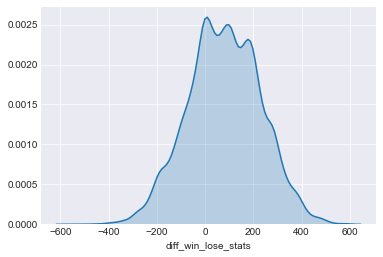

In [275]:
#calculate the difference between winner and loser
stats_sum_dict = dict(zip(pokemon['#'], pokemon['stats_sum']))
combats_stats_sum = combats[cols].replace(stats_sum_dict)
combats_stats_sum['Loser'] = combats_stats_sum.apply(lambda x: x['First_pokemon'] if x['First_pokemon'] != x['Winner']\
                             else x['Second_pokemon'],axis = 1)
diff_win_lose_stats = combats_stats_sum["Winner"] - combats_stats_sum["Loser"]

combats_stats_sum['diff'] = diff_win_lose_stats 
combats['diff'] = combats_stats_sum['diff']
combats_name['diff'] = combats_stats_sum['diff']

print(diff_win_lose_stats.describe())
sns.kdeplot(diff_win_lose_stats, shade=True)
plt.xlabel("diff_win_lose_stats")
plt.show()

In [276]:
#print the 10 highest winning rate pokemons
first_battle = combats_name['First_pokemon'].value_counts()
second_battle = combats_name['Second_pokemon'].value_counts()
win_counts = combats_name['Winner'].value_counts()
battle_num = first_battle + second_battle
battle_win = pd.DataFrame({'battle': battle_num, 'win': win_counts}, columns=['battle', 'win'])
battle_win["ratio"] = battle_win['win']/battle_win['battle']
battle_win.sort_values(by=['ratio'], ascending=False).head(10)

,battle,win,ratio
Mega Aerodactyl,129,127.0,0.984496
Weavile,119,116.0,0.974790
Tornadus Therian Forme,125,121.0,0.968000
Mega Beedrill,119,115.0,0.966387
Aerodactyl,141,136.0,0.964539
Mega Lopunny,129,124.0,0.961240
Greninja,127,122.0,0.960630
Meloetta Pirouette Forme,123,118.0,0.959350
Mega Mewtwo Y,125,119.0,0.952000
Mega Sharpedo,120,114.0,0.950000


count    50000.000000
mean         0.107312
std          1.296380
min        -15.500000
25%         -0.500000
50%          0.000000
75%          0.500000
max         15.937500
Name: Relation, dtype: float64


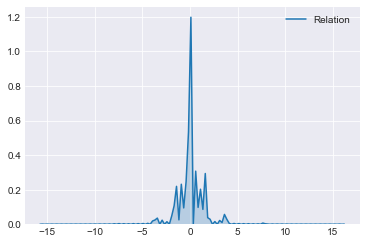

In [277]:
pokemon['Type'] = pokemon.apply(lambda x: x["Type 1"]+"/"+x["Type 2"], axis=1)
type_dict = dict(zip(pokemon['#'], pokemon['Type']))
combats_type = combats[cols].replace(type_dict)
combats_type["Loser"] = combats_type.apply(lambda x: x["First_pokemon"] if x["First_pokemon"] !=  x["Winner"]\
                        else x["Second_pokemon"], axis = 1)

zero_dict = {0: 0.25}
df_type_relation = df_type_relation[:].replace(zero_dict)

def calcRelation(combats_type):
    r0 = 1
    win_type1 = combats_type["Winner"].split("/")[0]
    win_type2 = combats_type["Winner"].split("/")[1]
    lose_type1 = combats_type["Loser"].split("/")[0]
    lose_type2 = combats_type["Loser"].split("/")[1]
    if win_type2 != "None" and lose_type2 != "None":
        r1 = df_type_relation[win_type1][lose_type1]
        r2 = df_type_relation[win_type1][lose_type2]
        r3 = df_type_relation[win_type2][lose_type1]
        r4 = df_type_relation[win_type2][lose_type2]
        r5 = df_type_relation[lose_type1][win_type1]
        r6 = df_type_relation[lose_type1][win_type2]
        r7 = df_type_relation[lose_type2][win_type1]
        r8 = df_type_relation[lose_type2][win_type2]
        r = r0 * r1 * r2 * r3 * r4 - r0 * r5 * r6 * r7 * r8
    elif win_type2 != "None" and lose_type2 == "None":
        r1 = df_type_relation[win_type1][lose_type1]
        r3 = df_type_relation[win_type2][lose_type1]
        r5 = df_type_relation[lose_type1][win_type1]
        r6 = df_type_relation[lose_type1][win_type2] 
        r = r0 * r1 * r3 - r0 * r5 * r6
    elif win_type2 == "None" and lose_type2 != "None":
        r1 = df_type_relation[win_type1][lose_type1]
        r2 = df_type_relation[win_type1][lose_type2]
        r5 = df_type_relation[lose_type1][win_type1]
        r7 = df_type_relation[lose_type2][win_type1]
        r = r0 * r1 * r2 - r0 * r5 * r7
    elif win_type2 == "None" and lose_type2 == "None":
        r1 = df_type_relation[win_type1][lose_type1]
        r5 = df_type_relation[lose_type1][win_type1]
        r = r0 * r1 - r0 * r5
    return r

combats_type["Relation"] = combats_type.apply(lambda x: calcRelation(x), axis = 1)
print (combats_type["Relation"].describe())
sns.kdeplot(combats_type["Relation"],shade = True)
plt.show()

# Cleaning

In [278]:
# fill in win and ratio of NaN
battle_win['win'] = battle_win['win'].fillna(0)
battle_win['ratio'] = battle_win['ratio'].fillna(0)
battle_win.loc[['Shuckle']]

,battle,win,ratio
Shuckle,135,0.0,0.0


In [279]:
id_dict = dict(zip(pokemon['Name'], pokemon['#']))
battle_win['Name'] = battle_win.index
battle_win['#'] = battle_win['Name'].replace(id_dict)
ratio_dict = dict(zip(battle_win['#'], battle_win['ratio']))
pokemon['ratio'] = pokemon['#'].replace(ratio_dict)
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,stats_sum,Type,ratio
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,Grass/Poison,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,Grass/Poison,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,Grass/Poison,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,625,Grass/Poison,0.560000
4,5,Charmander,Fire,None,39,52,43,60,50,65,309,Fire/None,0.491071


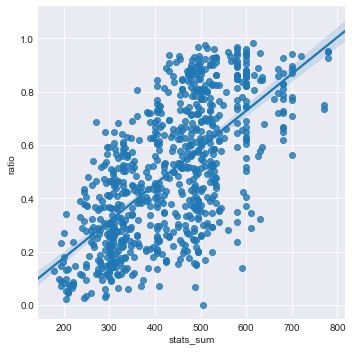

In [280]:
# find pokemon with no battle
nobattle_pokemon = pokemon[pokemon['ratio'] >= 1]


battle_pokemon = pokemon[pokemon['ratio'] <= 1]
sns.lmplot(x='stats_sum', y='ratio', data=battle_pokemon)

In [281]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(battle_pokemon['stats_sum'].values.reshape(-1, 1), battle_pokemon['ratio'].values.reshape(-1, 1))
nobattle_pokemon['ratio'] = linreg.predict(nobattle_pokemon['stats_sum'].values.reshape(-1, 1))
nobattle_pokemon

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,stats_sum,Type,ratio
11,12,Blastoise,Water,None,79,83,100,85,105,78,530,Water/None,0.632079
32,33,Sandshrew,Ground,None,50,75,85,20,30,40,300,Ground/None,0.314586
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,435,Normal/Fairy,0.500941
65,66,Poliwag,Water,None,40,50,40,40,40,90,300,Water/None,0.314586
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,490,Grass/Poison,0.576863
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,465,Electric/Steel,0.542353
143,144,Ditto,Normal,None,48,48,48,48,48,48,288,Normal/None,0.298021
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,390,Bug/Poison,0.438823
235,236,Ursaring,Normal,None,90,130,75,75,75,55,500,Normal/None,0.590667
321,322,Hariyama,Fighting,None,144,120,60,40,60,50,474,Fighting/None,0.554777


In [282]:
combats_add_data = combats.copy()
type_dict = dict(zip(pokemon['#'], pokemon['Type']))
hp_dict = dict(zip(pokemon['#'], pokemon['HP']))
attack_dict = dict(zip(pokemon['#'], pokemon['Attack']))
defense_dict = dict(zip(pokemon['#'], pokemon['Defense']))
spattack_dict = dict(zip(pokemon['#'], pokemon['Sp. Atk']))
spdefense_dict = dict(zip(pokemon['#'], pokemon['Sp. Def']))
speed_dict = dict(zip(pokemon['#'], pokemon['Speed']))
stats_sum_dict = dict(zip(pokemon['#'], pokemon['stats_sum']))
ratio_dict = dict(zip(pokemon['#'], pokemon['ratio']))
combats_add_data['First_pokemon_type'] = combats_add_data['First_pokemon'].replace(type_dict)
combats_add_data['First_pokemon_hp'] = combats_add_data['First_pokemon'].replace(hp_dict)
combats_add_data['First_pokemon_attack'] = combats_add_data['First_pokemon'].replace(attack_dict)
combats_add_data['First_pokemon_defense'] = combats_add_data['First_pokemon'].replace(defense_dict)
combats_add_data['First_pokemon_spattack'] = combats_add_data['First_pokemon'].replace(spattack_dict)
combats_add_data['First_pokemon_spdefense'] = combats_add_data['First_pokemon'].replace(spdefense_dict)
combats_add_data['First_pokemon_speed'] = combats_add_data['First_pokemon'].replace(speed_dict)
combats_add_data['First_pokemon_stats'] = combats_add_data['First_pokemon'].replace(stats_sum_dict)
combats_add_data['First_pokemon_ratio'] = combats_add_data['First_pokemon'].replace(ratio_dict)
combats_add_data['Second_pokemon_type'] = combats_add_data['Second_pokemon'].replace(type_dict)
combats_add_data['Second_pokemon_hp'] = combats_add_data['Second_pokemon'].replace(hp_dict)
combats_add_data['Second_pokemon_attack'] = combats_add_data['Second_pokemon'].replace(attack_dict)
combats_add_data['Second_pokemon_defense'] = combats_add_data['Second_pokemon'].replace(defense_dict)
combats_add_data['Second_pokemon_spattack'] = combats_add_data['Second_pokemon'].replace(spattack_dict)
combats_add_data['Second_pokemon_spdefense'] = combats_add_data['Second_pokemon'].replace(spdefense_dict)
combats_add_data['Second_pokemon_speed'] = combats_add_data['Second_pokemon'].replace(speed_dict)
combats_add_data['Second_pokemon_stats'] = combats_add_data['Second_pokemon'].replace(stats_sum_dict)
combats_add_data['Second_pokemon_ratio'] = combats_add_data['Second_pokemon'].replace(ratio_dict)

def calcTypeRelation(combats_add_data):
    r0 = 1
    first_type1 = combats_add_data["First_pokemon_type"].split("/")[0]
    first_type2 = combats_add_data["First_pokemon_type"].split("/")[1]
    second_type1 = combats_add_data["Second_pokemon_type"].split("/")[0]
    second_type2 = combats_add_data["Second_pokemon_type"].split("/")[1]
    if first_type2 != "None" and second_type2 != "None":
        r1 = df_type_relation[first_type1][second_type1]
        r2 = df_type_relation[first_type1][second_type2]
        r3 = df_type_relation[first_type2][second_type1]
        r4 = df_type_relation[first_type2][second_type2]
        r5 = df_type_relation[second_type1][first_type1]
        r6 = df_type_relation[second_type1][first_type2]
        r7 = df_type_relation[second_type2][first_type1]
        r8 = df_type_relation[second_type2][first_type2]
        r = r0 * r1 * r2 * r3 * r4 - r0 * r5 * r6 * r7 * r8
    elif first_type2 != "None" and second_type2 == "None":
        r1 = df_type_relation[first_type1][second_type1]
        r3 = df_type_relation[first_type2][second_type1]
        r5 = df_type_relation[second_type1][first_type1]
        r6 = df_type_relation[second_type1][first_type2] 
        r = r0 * r1 * r3 - r0 * r5 *r6
    elif first_type2 == "None" and second_type2 != "None":
        r1 = df_type_relation[first_type1][second_type1]
        r2 = df_type_relation[first_type1][second_type2]
        r5 = df_type_relation[second_type1][first_type1]
        r7 = df_type_relation[second_type2][first_type1]
        r = r0 * r1 * r2 - r0 * r5 * r7
    elif first_type2 == "None" and second_type2 == "None":
        r1 = df_type_relation[first_type1][second_type1]
        r5 = df_type_relation[second_type1][first_type1]
        r = r0 * r1 - r0 * r5
    return r

combats_add_data['Relation'] = combats_add_data.apply(lambda x: calcTypeRelation(x), axis = 1)
combats_add_data['First_win'] = combats_add_data.apply(lambda x: 1 if x['First_pokemon']==x['Winner'] else 0, axis=1)
combats_add_data = combats_add_data.drop(['First_pokemon','Second_pokemon','Winner','diff','First_pokemon_type','Second_pokemon_type'], axis = 1)
combats_add_data.head()

,First_pokemon_hp,First_pokemon_attack,First_pokemon_defense,First_pokemon_spattack,First_pokemon_spdefense,First_pokemon_speed,First_pokemon_stats,First_pokemon_ratio,Second_pokemon_hp,Second_pokemon_attack,Second_pokemon_defense,Second_pokemon_spattack,Second_pokemon_spdefense,Second_pokemon_speed,Second_pokemon_stats,Second_pokemon_ratio,Relation,First_win
0,50,64,50,45,50,41,300,0.227273,70,70,40,60,40,60,340,0.424779,-3.5,0
1,91,90,72,90,129,108,580,0.896000,91,129,90,72,90,108,580,0.853659,3.5,0
2,55,40,85,80,105,40,405,0.236220,75,75,75,125,95,40,485,0.156716,0.0,0
3,40,40,40,70,40,20,250,0.032520,77,120,90,60,90,48,485,0.278571,-0.5,0
4,70,60,125,115,70,55,495,0.355072,20,10,230,10,230,5,505,0.000000,3.0,1


In [283]:
combats_add_data['First_pokemon_ra'] = combats_add_data['First_pokemon_attack'] / combats_add_data['First_pokemon_spattack']
combats_add_data['Second_pokemon_ra'] = combats_add_data['Second_pokemon_attack'] / combats_add_data['Second_pokemon_spattack']

,First_pokemon_hp,First_pokemon_attack,First_pokemon_defense,First_pokemon_spattack,First_pokemon_spdefense,First_pokemon_speed,First_pokemon_stats,First_pokemon_ratio,Second_pokemon_hp,Second_pokemon_attack,Second_pokemon_defense,Second_pokemon_spattack,Second_pokemon_spdefense,Second_pokemon_speed,Second_pokemon_stats,Second_pokemon_ratio,Relation,First_win,First_pokemon_ra,Second_pokemon_ra
0,50,64,50,45,50,41,300,0.227273,70,70,40,60,40,60,340,0.424779,-3.5,0,1.422222,1.166667
1,91,90,72,90,129,108,580,0.896000,91,129,90,72,90,108,580,0.853659,3.5,0,1.000000,1.791667
2,55,40,85,80,105,40,405,0.236220,75,75,75,125,95,40,485,0.156716,0.0,0,0.500000,0.600000
3,40,40,40,70,40,20,250,0.032520,77,120,90,60,90,48,485,0.278571,-0.5,0,0.571429,2.000000
4,70,60,125,115,70,55,495,0.355072,20,10,230,10,230,5,505,0.000000,3.0,1,0.521739,1.000000


In [285]:
combats_print = combats_add_data.drop(['First_win','First_pokemon_ra','Second_pokemon_ra'],axis = 1)
combats_print.to_csv('combats_print.csv',index=False,header=True)

In [216]:
combats_attack = combats_add_data.loc[combats_add_data['First_pokemon_ra'] >= 1.5]
#combats_attack_attack
combats_attack_attack = combats_attack.loc[combats_add_data['Second_pokemon_ra'] >= 1.5]
combats_attack_attack = combats_attack_attack.drop(['First_pokemon_ra','Second_pokemon_ra'],axis = 1)
#combats_attack_balance
combats_attack_balance = combats_attack.loc[combats_add_data['Second_pokemon_ra'] < 1.5]
combats_attack_balance = combats_attack_balance.loc[combats_add_data['Second_pokemon_ra'] > 0.666667]
combats_attack_balance = combats_attack_balance.drop(['First_pokemon_ra','Second_pokemon_ra'],axis = 1)
#combats_attack_spattack
combats_attack_spattack = combats_attack.loc[combats_add_data['Second_pokemon_ra'] <= 0.666667]
combats_attack_spattack = combats_attack_spattack.drop(['First_pokemon_ra','Second_pokemon_ra'],axis = 1)

combats_balance = combats_add_data.loc[combats_add_data['First_pokemon_ra'] < 1.5]
combats_balance = combats_balance.loc[combats_add_data['First_pokemon_ra'] > 0.666667]
#combats_balance_attack
combats_balance_attack = combats_balance.loc[combats_add_data['Second_pokemon_ra'] >= 1.5]
combats_balance_attack = combats_balance_attack.drop(['First_pokemon_ra','Second_pokemon_ra'],axis = 1)
#combats_balance_balance
combats_balance_balance = combats_balance.loc[combats_add_data['Second_pokemon_ra'] < 1.5]
combats_balance_balance = combats_balance_balance.loc[combats_add_data['Second_pokemon_ra'] > 0.666667]
combats_balance_balance = combats_balance_balance.drop(['First_pokemon_ra','Second_pokemon_ra'],axis = 1)
#combats_balance_spattack
combats_balance_spattack = combats_balance.loc[combats_add_data['Second_pokemon_ra'] <= 0.666667]
combats_balance_spattack = combats_balance_spattack.drop(['First_pokemon_ra','Second_pokemon_ra'],axis = 1)

combats_spattack = combats_add_data.loc[combats_add_data['First_pokemon_ra'] <= 0.666667]
#combats_spattack_attack
combats_spattack_attack = combats_spattack.loc[combats_add_data['Second_pokemon_ra'] >= 1.5]
combats_spattack_attack = combats_spattack_attack.drop(['First_pokemon_ra','Second_pokemon_ra'],axis = 1)
#combats_spattack_balance
combats_spattack_balance = combats_spattack.loc[combats_add_data['Second_pokemon_ra'] < 1.5]
combats_spattack_balance = combats_spattack_balance.loc[combats_add_data['Second_pokemon_ra'] > 0.666667]
combats_spattack_balance = combats_spattack_balance.drop(['First_pokemon_ra','Second_pokemon_ra'],axis = 1)
#combats_spattack_spattack
combats_spattack_spattack = combats_spattack.loc[combats_add_data['Second_pokemon_ra'] <= 0.666667]
combats_spattack_spattack = combats_spattack_spattack.drop(['First_pokemon_ra','Second_pokemon_ra'],axis = 1)

In [288]:
#standardization
combats_attack_attack['First_pokemon_hp'] = (combats_attack_attack['First_pokemon_hp'] - combats_attack_attack['First_pokemon_hp'].mean()) / combats_attack_attack['First_pokemon_hp'].std()
combats_attack_attack['First_pokemon_attack'] = (combats_attack_attack['First_pokemon_attack'] - combats_attack_attack['First_pokemon_attack'].mean()) / combats_attack_attack['First_pokemon_attack'].std()
combats_attack_attack['First_pokemon_defense'] = (combats_attack_attack['First_pokemon_defense'] - combats_attack_attack['First_pokemon_defense'].mean()) / combats_attack_attack['First_pokemon_defense'].std()
combats_attack_attack['First_pokemon_spattack'] = (combats_attack_attack['First_pokemon_spattack'] - combats_attack_attack['First_pokemon_spattack'].mean()) / combats_attack_attack['First_pokemon_spattack'].std()
combats_attack_attack['First_pokemon_spdefense'] = (combats_attack_attack['First_pokemon_spdefense'] - combats_attack_attack['First_pokemon_spdefense'].mean()) / combats_attack_attack['First_pokemon_spdefense'].std()
combats_attack_attack['First_pokemon_speed'] = (combats_attack_attack['First_pokemon_speed'] - combats_attack_attack['First_pokemon_speed'].mean()) / combats_attack_attack['First_pokemon_speed'].std()
combats_attack_attack['First_pokemon_stats'] = (combats_attack_attack['First_pokemon_stats'] - combats_attack_attack['First_pokemon_stats'].mean()) / combats_attack_attack['First_pokemon_stats'].std()
combats_attack_attack['Second_pokemon_hp'] = (combats_attack_attack['Second_pokemon_hp'] - combats_attack_attack['Second_pokemon_hp'].mean()) / combats_attack_attack['Second_pokemon_hp'].std()
combats_attack_attack['Second_pokemon_attack'] = (combats_attack_attack['Second_pokemon_attack'] - combats_attack_attack['Second_pokemon_attack'].mean()) / combats_attack_attack['Second_pokemon_attack'].std()
combats_attack_attack['Second_pokemon_defense'] = (combats_attack_attack['Second_pokemon_defense'] - combats_attack_attack['Second_pokemon_defense'].mean()) / combats_attack_attack['Second_pokemon_defense'].std()
combats_attack_attack['Second_pokemon_spattack'] = (combats_attack_attack['Second_pokemon_spattack'] - combats_attack_attack['Second_pokemon_spattack'].mean()) / combats_attack_attack['Second_pokemon_spattack'].std()
combats_attack_attack['Second_pokemon_spdefense'] = (combats_attack_attack['Second_pokemon_spdefense'] - combats_attack_attack['Second_pokemon_spdefense'].mean()) / combats_attack_attack['Second_pokemon_spdefense'].std()
combats_attack_attack['Second_pokemon_speed'] = (combats_attack_attack['Second_pokemon_speed'] - combats_attack_attack['Second_pokemon_speed'].mean()) / combats_attack_attack['Second_pokemon_speed'].std()
combats_attack_attack['Second_pokemon_stats'] = (combats_attack_attack['Second_pokemon_stats'] - combats_attack_attack['Second_pokemon_stats'].mean()) / combats_attack_attack['Second_pokemon_stats'].std()

combats_attack_balance['First_pokemon_hp'] = (combats_attack_balance['First_pokemon_hp'] - combats_attack_balance['First_pokemon_hp'].mean()) / combats_attack_balance['First_pokemon_hp'].std()
combats_attack_balance['First_pokemon_attack'] = (combats_attack_balance['First_pokemon_attack'] - combats_attack_balance['First_pokemon_attack'].mean()) / combats_attack_balance['First_pokemon_attack'].std()
combats_attack_balance['First_pokemon_defense'] = (combats_attack_balance['First_pokemon_defense'] - combats_attack_balance['First_pokemon_defense'].mean()) / combats_attack_balance['First_pokemon_defense'].std()
combats_attack_balance['First_pokemon_spattack'] = (combats_attack_balance['First_pokemon_spattack'] - combats_attack_balance['First_pokemon_spattack'].mean()) / combats_attack_balance['First_pokemon_spattack'].std()
combats_attack_balance['First_pokemon_spdefense'] = (combats_attack_balance['First_pokemon_spdefense'] - combats_attack_balance['First_pokemon_spdefense'].mean()) / combats_attack_balance['First_pokemon_spdefense'].std()
combats_attack_balance['First_pokemon_speed'] = (combats_attack_balance['First_pokemon_speed'] - combats_attack_balance['First_pokemon_speed'].mean()) / combats_attack_balance['First_pokemon_speed'].std()
combats_attack_balance['First_pokemon_stats'] = (combats_attack_balance['First_pokemon_stats'] - combats_attack_balance['First_pokemon_stats'].mean()) / combats_attack_balance['First_pokemon_stats'].std()
combats_attack_balance['Second_pokemon_hp'] = (combats_attack_balance['Second_pokemon_hp'] - combats_attack_balance['Second_pokemon_hp'].mean()) / combats_attack_balance['Second_pokemon_hp'].std()
combats_attack_balance['Second_pokemon_attack'] = (combats_attack_balance['Second_pokemon_attack'] - combats_attack_balance['Second_pokemon_attack'].mean()) / combats_attack_balance['Second_pokemon_attack'].std()
combats_attack_balance['Second_pokemon_defense'] = (combats_attack_balance['Second_pokemon_defense'] - combats_attack_balance['Second_pokemon_defense'].mean()) / combats_attack_balance['Second_pokemon_defense'].std()
combats_attack_balance['Second_pokemon_spattack'] = (combats_attack_balance['Second_pokemon_spattack'] - combats_attack_balance['Second_pokemon_spattack'].mean()) / combats_attack_balance['Second_pokemon_spattack'].std()
combats_attack_balance['Second_pokemon_spdefense'] = (combats_attack_balance['Second_pokemon_spdefense'] - combats_attack_balance['Second_pokemon_spdefense'].mean()) / combats_attack_balance['Second_pokemon_spdefense'].std()
combats_attack_balance['Second_pokemon_speed'] = (combats_attack_balance['Second_pokemon_speed'] - combats_attack_balance['Second_pokemon_speed'].mean()) / combats_attack_balance['Second_pokemon_speed'].std()
combats_attack_balance['Second_pokemon_stats'] = (combats_attack_balance['Second_pokemon_stats'] - combats_attack_balance['Second_pokemon_stats'].mean()) / combats_attack_balance['Second_pokemon_stats'].std()

combats_attack_spattack['First_pokemon_hp'] = (combats_attack_spattack['First_pokemon_hp'] - combats_attack_spattack['First_pokemon_hp'].mean()) / combats_attack_spattack['First_pokemon_hp'].std()
combats_attack_spattack['First_pokemon_attack'] = (combats_attack_spattack['First_pokemon_attack'] - combats_attack_spattack['First_pokemon_attack'].mean()) / combats_attack_spattack['First_pokemon_attack'].std()
combats_attack_spattack['First_pokemon_defense'] = (combats_attack_spattack['First_pokemon_defense'] - combats_attack_spattack['First_pokemon_defense'].mean()) / combats_attack_spattack['First_pokemon_defense'].std()
combats_attack_spattack['First_pokemon_spattack'] = (combats_attack_spattack['First_pokemon_spattack'] - combats_attack_spattack['First_pokemon_spattack'].mean()) / combats_attack_spattack['First_pokemon_spattack'].std()
combats_attack_spattack['First_pokemon_spdefense'] = (combats_attack_spattack['First_pokemon_spdefense'] - combats_attack_spattack['First_pokemon_spdefense'].mean()) / combats_attack_spattack['First_pokemon_spdefense'].std()
combats_attack_spattack['First_pokemon_speed'] = (combats_attack_spattack['First_pokemon_speed'] - combats_attack_spattack['First_pokemon_speed'].mean()) / combats_attack_spattack['First_pokemon_speed'].std()
combats_attack_spattack['First_pokemon_stats'] = (combats_attack_spattack['First_pokemon_stats'] - combats_attack_spattack['First_pokemon_stats'].mean()) / combats_attack_spattack['First_pokemon_stats'].std()
combats_attack_spattack['Second_pokemon_hp'] = (combats_attack_spattack['Second_pokemon_hp'] - combats_attack_spattack['Second_pokemon_hp'].mean()) / combats_attack_spattack['Second_pokemon_hp'].std()
combats_attack_spattack['Second_pokemon_attack'] = (combats_attack_spattack['Second_pokemon_attack'] - combats_attack_spattack['Second_pokemon_attack'].mean()) / combats_attack_spattack['Second_pokemon_attack'].std()
combats_attack_spattack['Second_pokemon_defense'] = (combats_attack_spattack['Second_pokemon_defense'] - combats_attack_spattack['Second_pokemon_defense'].mean()) / combats_attack_spattack['Second_pokemon_defense'].std()
combats_attack_spattack['Second_pokemon_spattack'] = (combats_attack_spattack['Second_pokemon_spattack'] - combats_attack_spattack['Second_pokemon_spattack'].mean()) / combats_attack_spattack['Second_pokemon_spattack'].std()
combats_attack_spattack['Second_pokemon_spdefense'] = (combats_attack_spattack['Second_pokemon_spdefense'] - combats_attack_spattack['Second_pokemon_spdefense'].mean()) / combats_attack_spattack['Second_pokemon_spdefense'].std()
combats_attack_spattack['Second_pokemon_speed'] = (combats_attack_spattack['Second_pokemon_speed'] - combats_attack_spattack['Second_pokemon_speed'].mean()) / combats_attack_spattack['Second_pokemon_speed'].std()
combats_attack_spattack['Second_pokemon_stats'] = (combats_attack_spattack['Second_pokemon_stats'] - combats_attack_spattack['Second_pokemon_stats'].mean()) / combats_attack_spattack['Second_pokemon_stats'].std()

combats_balance_attack['First_pokemon_hp'] = (combats_balance_attack['First_pokemon_hp'] - combats_balance_attack['First_pokemon_hp'].mean()) / combats_balance_attack['First_pokemon_hp'].std()
combats_balance_attack['First_pokemon_attack'] = (combats_balance_attack['First_pokemon_attack'] - combats_balance_attack['First_pokemon_attack'].mean()) / combats_balance_attack['First_pokemon_attack'].std()
combats_balance_attack['First_pokemon_defense'] = (combats_balance_attack['First_pokemon_defense'] - combats_balance_attack['First_pokemon_defense'].mean()) / combats_balance_attack['First_pokemon_defense'].std()
combats_balance_attack['First_pokemon_spattack'] = (combats_balance_attack['First_pokemon_spattack'] - combats_balance_attack['First_pokemon_spattack'].mean()) / combats_balance_attack['First_pokemon_spattack'].std()
combats_balance_attack['First_pokemon_spdefense'] = (combats_balance_attack['First_pokemon_spdefense'] - combats_balance_attack['First_pokemon_spdefense'].mean()) / combats_balance_attack['First_pokemon_spdefense'].std()
combats_balance_attack['First_pokemon_speed'] = (combats_balance_attack['First_pokemon_speed'] - combats_balance_attack['First_pokemon_speed'].mean()) / combats_balance_attack['First_pokemon_speed'].std()
combats_balance_attack['First_pokemon_stats'] = (combats_balance_attack['First_pokemon_stats'] - combats_balance_attack['First_pokemon_stats'].mean()) / combats_balance_attack['First_pokemon_stats'].std()
combats_balance_attack['Second_pokemon_hp'] = (combats_balance_attack['Second_pokemon_hp'] - combats_balance_attack['Second_pokemon_hp'].mean()) / combats_balance_attack['Second_pokemon_hp'].std()
combats_balance_attack['Second_pokemon_attack'] = (combats_balance_attack['Second_pokemon_attack'] - combats_balance_attack['Second_pokemon_attack'].mean()) / combats_balance_attack['Second_pokemon_attack'].std()
combats_balance_attack['Second_pokemon_defense'] = (combats_balance_attack['Second_pokemon_defense'] - combats_balance_attack['Second_pokemon_defense'].mean()) / combats_balance_attack['Second_pokemon_defense'].std()
combats_balance_attack['Second_pokemon_spattack'] = (combats_balance_attack['Second_pokemon_spattack'] - combats_balance_attack['Second_pokemon_spattack'].mean()) / combats_balance_attack['Second_pokemon_spattack'].std()
combats_balance_attack['Second_pokemon_spdefense'] = (combats_balance_attack['Second_pokemon_spdefense'] - combats_balance_attack['Second_pokemon_spdefense'].mean()) / combats_balance_attack['Second_pokemon_spdefense'].std()
combats_balance_attack['Second_pokemon_speed'] = (combats_balance_attack['Second_pokemon_speed'] - combats_balance_attack['Second_pokemon_speed'].mean()) / combats_balance_attack['Second_pokemon_speed'].std()
combats_balance_attack['Second_pokemon_stats'] = (combats_balance_attack['Second_pokemon_stats'] - combats_balance_attack['Second_pokemon_stats'].mean()) / combats_balance_attack['Second_pokemon_stats'].std()

combats_balance_balance['First_pokemon_hp'] = (combats_balance_balance['First_pokemon_hp'] - combats_balance_balance['First_pokemon_hp'].mean()) / combats_balance_balance['First_pokemon_hp'].std()
combats_balance_balance['First_pokemon_attack'] = (combats_balance_balance['First_pokemon_attack'] - combats_balance_balance['First_pokemon_attack'].mean()) / combats_balance_balance['First_pokemon_attack'].std()
combats_balance_balance['First_pokemon_defense'] = (combats_balance_balance['First_pokemon_defense'] - combats_balance_balance['First_pokemon_defense'].mean()) / combats_balance_balance['First_pokemon_defense'].std()
combats_balance_balance['First_pokemon_spattack'] = (combats_balance_balance['First_pokemon_spattack'] - combats_balance_balance['First_pokemon_spattack'].mean()) / combats_balance_balance['First_pokemon_spattack'].std()
combats_balance_balance['First_pokemon_spdefense'] = (combats_balance_balance['First_pokemon_spdefense'] - combats_balance_balance['First_pokemon_spdefense'].mean()) / combats_balance_balance['First_pokemon_spdefense'].std()
combats_balance_balance['First_pokemon_speed'] = (combats_balance_balance['First_pokemon_speed'] - combats_balance_balance['First_pokemon_speed'].mean()) / combats_balance_balance['First_pokemon_speed'].std()
combats_balance_balance['First_pokemon_stats'] = (combats_balance_balance['First_pokemon_stats'] - combats_balance_balance['First_pokemon_stats'].mean()) / combats_balance_balance['First_pokemon_stats'].std()
combats_balance_balance['Second_pokemon_hp'] = (combats_balance_balance['Second_pokemon_hp'] - combats_balance_balance['Second_pokemon_hp'].mean()) / combats_balance_balance['Second_pokemon_hp'].std()
combats_balance_balance['Second_pokemon_attack'] = (combats_balance_balance['Second_pokemon_attack'] - combats_balance_balance['Second_pokemon_attack'].mean()) / combats_balance_balance['Second_pokemon_attack'].std()
combats_balance_balance['Second_pokemon_defense'] = (combats_balance_balance['Second_pokemon_defense'] - combats_balance_balance['Second_pokemon_defense'].mean()) / combats_balance_balance['Second_pokemon_defense'].std()
combats_balance_balance['Second_pokemon_spattack'] = (combats_balance_balance['Second_pokemon_spattack'] - combats_balance_balance['Second_pokemon_spattack'].mean()) / combats_balance_balance['Second_pokemon_spattack'].std()
combats_balance_balance['Second_pokemon_spdefense'] = (combats_balance_balance['Second_pokemon_spdefense'] - combats_balance_balance['Second_pokemon_spdefense'].mean()) / combats_balance_balance['Second_pokemon_spdefense'].std()
combats_balance_balance['Second_pokemon_speed'] = (combats_balance_balance['Second_pokemon_speed'] - combats_balance_balance['Second_pokemon_speed'].mean()) / combats_balance_balance['Second_pokemon_speed'].std()
combats_balance_balance['Second_pokemon_stats'] = (combats_balance_balance['Second_pokemon_stats'] - combats_balance_balance['Second_pokemon_stats'].mean()) / combats_balance_balance['Second_pokemon_stats'].std()

combats_balance_spattack['First_pokemon_hp'] = (combats_balance_spattack['First_pokemon_hp'] - combats_balance_spattack['First_pokemon_hp'].mean()) / combats_balance_spattack['First_pokemon_hp'].std()
combats_balance_spattack['First_pokemon_attack'] = (combats_balance_spattack['First_pokemon_attack'] - combats_balance_spattack['First_pokemon_attack'].mean()) / combats_balance_spattack['First_pokemon_attack'].std()
combats_balance_spattack['First_pokemon_defense'] = (combats_balance_spattack['First_pokemon_defense'] - combats_balance_spattack['First_pokemon_defense'].mean()) / combats_balance_spattack['First_pokemon_defense'].std()
combats_balance_spattack['First_pokemon_spattack'] = (combats_balance_spattack['First_pokemon_spattack'] - combats_balance_spattack['First_pokemon_spattack'].mean()) / combats_balance_spattack['First_pokemon_spattack'].std()
combats_balance_spattack['First_pokemon_spdefense'] = (combats_balance_spattack['First_pokemon_spdefense'] - combats_balance_spattack['First_pokemon_spdefense'].mean()) / combats_balance_spattack['First_pokemon_spdefense'].std()
combats_balance_spattack['First_pokemon_speed'] = (combats_balance_spattack['First_pokemon_speed'] - combats_balance_spattack['First_pokemon_speed'].mean()) / combats_balance_spattack['First_pokemon_speed'].std()
combats_balance_spattack['First_pokemon_stats'] = (combats_balance_spattack['First_pokemon_stats'] - combats_balance_spattack['First_pokemon_stats'].mean()) / combats_balance_spattack['First_pokemon_stats'].std()
combats_balance_spattack['Second_pokemon_hp'] = (combats_balance_spattack['Second_pokemon_hp'] - combats_balance_spattack['Second_pokemon_hp'].mean()) / combats_balance_spattack['Second_pokemon_hp'].std()
combats_balance_spattack['Second_pokemon_attack'] = (combats_balance_spattack['Second_pokemon_attack'] - combats_balance_spattack['Second_pokemon_attack'].mean()) / combats_balance_spattack['Second_pokemon_attack'].std()
combats_balance_spattack['Second_pokemon_defense'] = (combats_balance_spattack['Second_pokemon_defense'] - combats_balance_spattack['Second_pokemon_defense'].mean()) / combats_balance_spattack['Second_pokemon_defense'].std()
combats_balance_spattack['Second_pokemon_spattack'] = (combats_balance_spattack['Second_pokemon_spattack'] - combats_balance_spattack['Second_pokemon_spattack'].mean()) / combats_balance_spattack['Second_pokemon_spattack'].std()
combats_balance_spattack['Second_pokemon_spdefense'] = (combats_balance_spattack['Second_pokemon_spdefense'] - combats_balance_spattack['Second_pokemon_spdefense'].mean()) / combats_balance_spattack['Second_pokemon_spdefense'].std()
combats_balance_spattack['Second_pokemon_speed'] = (combats_balance_spattack['Second_pokemon_speed'] - combats_balance_spattack['Second_pokemon_speed'].mean()) / combats_balance_spattack['Second_pokemon_speed'].std()
combats_balance_spattack['Second_pokemon_stats'] = (combats_balance_spattack['Second_pokemon_stats'] - combats_balance_spattack['Second_pokemon_stats'].mean()) / combats_balance_spattack['Second_pokemon_stats'].std()

combats_spattack_attack['First_pokemon_hp'] = (combats_spattack_attack['First_pokemon_hp'] - combats_spattack_attack['First_pokemon_hp'].mean()) / combats_spattack_attack['First_pokemon_hp'].std()
combats_spattack_attack['First_pokemon_attack'] = (combats_spattack_attack['First_pokemon_attack'] - combats_spattack_attack['First_pokemon_attack'].mean()) / combats_spattack_attack['First_pokemon_attack'].std()
combats_spattack_attack['First_pokemon_defense'] = (combats_spattack_attack['First_pokemon_defense'] - combats_spattack_attack['First_pokemon_defense'].mean()) / combats_spattack_attack['First_pokemon_defense'].std()
combats_spattack_attack['First_pokemon_spattack'] = (combats_spattack_attack['First_pokemon_spattack'] - combats_spattack_attack['First_pokemon_spattack'].mean()) / combats_spattack_attack['First_pokemon_spattack'].std()
combats_spattack_attack['First_pokemon_spdefense'] = (combats_spattack_attack['First_pokemon_spdefense'] - combats_spattack_attack['First_pokemon_spdefense'].mean()) / combats_spattack_attack['First_pokemon_spdefense'].std()
combats_spattack_attack['First_pokemon_speed'] = (combats_spattack_attack['First_pokemon_speed'] - combats_spattack_attack['First_pokemon_speed'].mean()) / combats_spattack_attack['First_pokemon_speed'].std()
combats_spattack_attack['First_pokemon_stats'] = (combats_spattack_attack['First_pokemon_stats'] - combats_spattack_attack['First_pokemon_stats'].mean()) / combats_spattack_attack['First_pokemon_stats'].std()
combats_spattack_attack['Second_pokemon_hp'] = (combats_spattack_attack['Second_pokemon_hp'] - combats_spattack_attack['Second_pokemon_hp'].mean()) / combats_spattack_attack['Second_pokemon_hp'].std()
combats_spattack_attack['Second_pokemon_attack'] = (combats_spattack_attack['Second_pokemon_attack'] - combats_spattack_attack['Second_pokemon_attack'].mean()) / combats_spattack_attack['Second_pokemon_attack'].std()
combats_spattack_attack['Second_pokemon_defense'] = (combats_spattack_attack['Second_pokemon_defense'] - combats_spattack_attack['Second_pokemon_defense'].mean()) / combats_spattack_attack['Second_pokemon_defense'].std()
combats_spattack_attack['Second_pokemon_spattack'] = (combats_spattack_attack['Second_pokemon_spattack'] - combats_spattack_attack['Second_pokemon_spattack'].mean()) / combats_spattack_attack['Second_pokemon_spattack'].std()
combats_spattack_attack['Second_pokemon_spdefense'] = (combats_spattack_attack['Second_pokemon_spdefense'] - combats_spattack_attack['Second_pokemon_spdefense'].mean()) / combats_spattack_attack['Second_pokemon_spdefense'].std()
combats_spattack_attack['Second_pokemon_speed'] = (combats_spattack_attack['Second_pokemon_speed'] - combats_spattack_attack['Second_pokemon_speed'].mean()) / combats_spattack_attack['Second_pokemon_speed'].std()
combats_spattack_attack['Second_pokemon_stats'] = (combats_spattack_attack['Second_pokemon_stats'] - combats_spattack_attack['Second_pokemon_stats'].mean()) / combats_spattack_attack['Second_pokemon_stats'].std()

combats_spattack_balance['First_pokemon_hp'] = (combats_spattack_balance['First_pokemon_hp'] - combats_spattack_balance['First_pokemon_hp'].mean()) / combats_spattack_balance['First_pokemon_hp'].std()
combats_spattack_balance['First_pokemon_attack'] = (combats_spattack_balance['First_pokemon_attack'] - combats_spattack_balance['First_pokemon_attack'].mean()) / combats_spattack_balance['First_pokemon_attack'].std()
combats_spattack_balance['First_pokemon_defense'] = (combats_spattack_balance['First_pokemon_defense'] - combats_spattack_balance['First_pokemon_defense'].mean()) / combats_spattack_balance['First_pokemon_defense'].std()
combats_spattack_balance['First_pokemon_spattack'] = (combats_spattack_balance['First_pokemon_spattack'] - combats_spattack_balance['First_pokemon_spattack'].mean()) / combats_spattack_balance['First_pokemon_spattack'].std()
combats_spattack_balance['First_pokemon_spdefense'] = (combats_spattack_balance['First_pokemon_spdefense'] - combats_spattack_balance['First_pokemon_spdefense'].mean()) / combats_spattack_balance['First_pokemon_spdefense'].std()
combats_spattack_balance['First_pokemon_speed'] = (combats_spattack_balance['First_pokemon_speed'] - combats_spattack_balance['First_pokemon_speed'].mean()) / combats_spattack_balance['First_pokemon_speed'].std()
combats_spattack_balance['First_pokemon_stats'] = (combats_spattack_balance['First_pokemon_stats'] - combats_spattack_balance['First_pokemon_stats'].mean()) / combats_spattack_balance['First_pokemon_stats'].std()
combats_spattack_balance['Second_pokemon_hp'] = (combats_spattack_balance['Second_pokemon_hp'] - combats_spattack_balance['Second_pokemon_hp'].mean()) / combats_spattack_balance['Second_pokemon_hp'].std()
combats_spattack_balance['Second_pokemon_attack'] = (combats_spattack_balance['Second_pokemon_attack'] - combats_spattack_balance['Second_pokemon_attack'].mean()) / combats_spattack_balance['Second_pokemon_attack'].std()
combats_spattack_balance['Second_pokemon_defense'] = (combats_spattack_balance['Second_pokemon_defense'] - combats_spattack_balance['Second_pokemon_defense'].mean()) / combats_spattack_balance['Second_pokemon_defense'].std()
combats_spattack_balance['Second_pokemon_spattack'] = (combats_spattack_balance['Second_pokemon_spattack'] - combats_spattack_balance['Second_pokemon_spattack'].mean()) / combats_spattack_balance['Second_pokemon_spattack'].std()
combats_spattack_balance['Second_pokemon_spdefense'] = (combats_spattack_balance['Second_pokemon_spdefense'] - combats_spattack_balance['Second_pokemon_spdefense'].mean()) / combats_spattack_balance['Second_pokemon_spdefense'].std()
combats_spattack_balance['Second_pokemon_speed'] = (combats_spattack_balance['Second_pokemon_speed'] - combats_spattack_balance['Second_pokemon_speed'].mean()) / combats_spattack_balance['Second_pokemon_speed'].std()
combats_spattack_balance['Second_pokemon_stats'] = (combats_spattack_balance['Second_pokemon_stats'] - combats_spattack_balance['Second_pokemon_stats'].mean()) / combats_spattack_balance['Second_pokemon_stats'].std()

combats_spattack_spattack['First_pokemon_hp'] = (combats_spattack_spattack['First_pokemon_hp'] - combats_spattack_spattack['First_pokemon_hp'].mean()) / combats_spattack_spattack['First_pokemon_hp'].std()
combats_spattack_spattack['First_pokemon_attack'] = (combats_spattack_spattack['First_pokemon_attack'] - combats_spattack_spattack['First_pokemon_attack'].mean()) / combats_spattack_spattack['First_pokemon_attack'].std()
combats_spattack_spattack['First_pokemon_defense'] = (combats_spattack_spattack['First_pokemon_defense'] - combats_spattack_spattack['First_pokemon_defense'].mean()) / combats_spattack_spattack['First_pokemon_defense'].std()
combats_spattack_spattack['First_pokemon_spattack'] = (combats_spattack_spattack['First_pokemon_spattack'] - combats_spattack_spattack['First_pokemon_spattack'].mean()) / combats_spattack_spattack['First_pokemon_spattack'].std()
combats_spattack_spattack['First_pokemon_spdefense'] = (combats_spattack_spattack['First_pokemon_spdefense'] - combats_spattack_spattack['First_pokemon_spdefense'].mean()) / combats_spattack_spattack['First_pokemon_spdefense'].std()
combats_spattack_spattack['First_pokemon_speed'] = (combats_spattack_spattack['First_pokemon_speed'] - combats_spattack_spattack['First_pokemon_speed'].mean()) / combats_spattack_spattack['First_pokemon_speed'].std()
combats_spattack_spattack['First_pokemon_stats'] = (combats_spattack_spattack['First_pokemon_stats'] - combats_spattack_spattack['First_pokemon_stats'].mean()) / combats_spattack_spattack['First_pokemon_stats'].std()
combats_spattack_spattack['Second_pokemon_hp'] = (combats_spattack_spattack['Second_pokemon_hp'] - combats_spattack_spattack['Second_pokemon_hp'].mean()) / combats_spattack_spattack['Second_pokemon_hp'].std()
combats_spattack_spattack['Second_pokemon_attack'] = (combats_spattack_spattack['Second_pokemon_attack'] - combats_spattack_spattack['Second_pokemon_attack'].mean()) / combats_spattack_spattack['Second_pokemon_attack'].std()
combats_spattack_spattack['Second_pokemon_defense'] = (combats_spattack_spattack['Second_pokemon_defense'] - combats_spattack_spattack['Second_pokemon_defense'].mean()) / combats_spattack_spattack['Second_pokemon_defense'].std()
combats_spattack_spattack['Second_pokemon_spattack'] = (combats_spattack_spattack['Second_pokemon_spattack'] - combats_spattack_spattack['Second_pokemon_spattack'].mean()) / combats_spattack_spattack['Second_pokemon_spattack'].std()
combats_spattack_spattack['Second_pokemon_spdefense'] = (combats_spattack_spattack['Second_pokemon_spdefense'] - combats_spattack_spattack['Second_pokemon_spdefense'].mean()) / combats_spattack_spattack['Second_pokemon_spdefense'].std()
combats_spattack_spattack['Second_pokemon_speed'] = (combats_spattack_spattack['Second_pokemon_speed'] - combats_spattack_spattack['Second_pokemon_speed'].mean()) / combats_spattack_spattack['Second_pokemon_speed'].std()
combats_spattack_spattack['Second_pokemon_stats'] = (combats_spattack_spattack['Second_pokemon_stats'] - combats_spattack_spattack['Second_pokemon_stats'].mean()) / combats_spattack_spattack['Second_pokemon_stats'].std()

In [289]:
combats_balance_balance.head()

,First_pokemon_hp,First_pokemon_attack,First_pokemon_defense,First_pokemon_spattack,First_pokemon_spdefense,First_pokemon_speed,First_pokemon_stats,First_pokemon_ratio,Second_pokemon_hp,Second_pokemon_attack,Second_pokemon_defense,Second_pokemon_spattack,Second_pokemon_spdefense,Second_pokemon_speed,Second_pokemon_stats,Second_pokemon_ratio,Relation,First_win
0,-0.866132,-0.473628,-0.788975,-1.063079,-0.841314,-0.993532,-1.144987,0.227273,-0.034330,-0.284031,-1.143302,-0.584192,-1.204056,-0.343975,-0.832516,0.424779,-3.50,0
5,-0.866132,-1.020839,-0.788975,-0.681463,-0.841314,-0.161523,-0.993762,0.463768,-0.449985,-0.933488,2.673249,-0.901159,2.754098,-0.343975,0.604189,0.520661,-0.25,1
12,-0.866132,-1.889938,-0.614967,-1.699104,-1.733156,-1.374869,-1.901110,0.097744,1.212635,1.014884,0.591494,0.208225,0.595105,-0.343975,0.723914,0.477941,0.50,0
16,2.465027,0.202338,0.255070,0.208972,0.764002,-0.334858,0.725423,0.438849,0.796980,0.203062,0.071055,1.159126,0.954937,1.569672,1.083090,0.938144,-1.00,0
18,-0.033343,2.133669,0.533481,1.958042,-0.127840,1.467826,1.441750,0.888889,-0.865641,-0.933488,2.673249,-0.901159,2.754098,-0.691911,0.444555,0.257143,3.75,1


# Training

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X_bb = combats_balance_balance.drop('First_win', axis=1)
y_bb = combats_balance_balance['First_win']

logreg = LogisticRegression()
scores_log = cross_val_score(logreg, X_bb, y_bb, cv=5)
acc_log = scores_log.mean() * 100

knn = KNeighborsClassifier(n_neighbors = 3)
scores_knn = cross_val_score(knn, X_bb, y_bb, cv=5)
acc_knn = scores_knn.mean() * 100

gaussian = GaussianNB()
scores_gaussian = cross_val_score(gaussian, X_bb, y_bb, cv=5)
acc_gaussian = scores_gaussian.mean() * 100

decision_tree = DecisionTreeClassifier()
scores_decision_tree = cross_val_score(decision_tree, X_bb, y_bb, cv=5)
acc_decision_tree = scores_decision_tree.mean() * 100

random_forest = RandomForestClassifier(n_estimators=100)
scores_random_forest = cross_val_score(random_forest, X_bb, y_bb, cv=5)
acc_random_forest = scores_random_forest.mean() * 100

modelrank = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Naive Bayes','Decision Tree','Random Forest'],
    'Score': [acc_log,acc_knn,acc_gaussian,acc_decision_tree,acc_random_forest]})
modelrank.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,95.765439
3,Decision Tree,94.633728
0,Logistic Regression,92.991026
1,KNN,87.594322
2,Naive Bayes,83.207650


In [219]:
from sklearn.model_selection import train_test_split

#accuracy for balance to balance
X_train_bb, X_test_bb, y_train_bb, y_test_bb = train_test_split(X_bb, y_bb, train_size=0.8, random_state=1)
print("X_train.shape = " + str(X_train_bb.shape))
print("X_test.shape = " + str(X_test_bb.shape))
print("y_train.shape = " + str(y_train_bb.shape))
print("y_test.shape = " + str(y_test_bb.shape))

random_forest_bb = RandomForestClassifier(n_estimators=100)
random_forest_bb.fit(X_train_bb, y_train_bb)
score_bb = round(random_forest_bb.score(X_test_bb, y_test_bb) * 100, 2)
score_bb

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


X_train.shape = (13148, 17)
X_test.shape = (3288, 17)
y_train.shape = (13148,)
y_test.shape = (3288,)


95.77

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


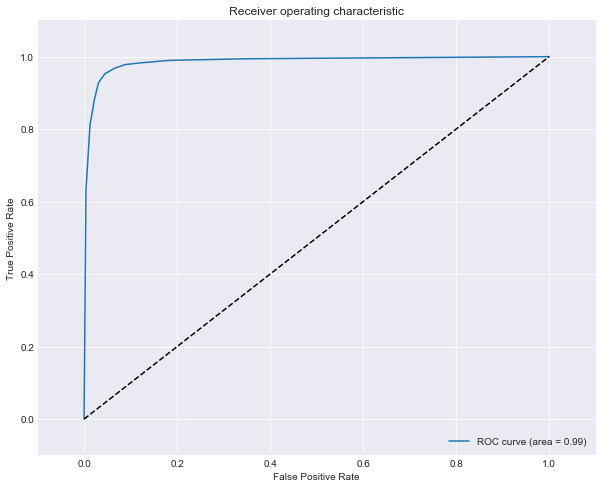

In [221]:
fig, axis = plt.subplots(figsize=(10,8))
from sklearn.metrics import auc, roc_curve
def generate_auc(X,y,clf_class,**kwargs):
    X_train_bb, X_test_bb, y_train_bb, y_test_bb = train_test_split(X_bb, y_bb, train_size=0.8, random_state=1)
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train_bb, y_train_bb).predict_proba(X_test_bb)
    
    fpr, tpr, thresholds = roc_curve(y_test_bb, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc, thresholds

fpr,tpr,roc_auc, thresholds = generate_auc(X_bb,y_bb,RandomForestClassifier)

def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

In [222]:
#test for attack to attack
X_aa1 = combats_attack_attack.drop(['First_win'], axis=1)
X_aa2 = combats_attack_attack.drop(['First_win','First_pokemon_spattack','First_pokemon_spdefense',
                                   'Second_pokemon_spattack','Second_pokemon_spdefense'], axis=1)
y_aa = combats_attack_attack['First_win']

random_forest = RandomForestClassifier(n_estimators=100)
scores_random_forest_aa1 = cross_val_score(random_forest, X_aa1, y_aa, cv=5)
acc_random_forest_aa1 = scores_random_forest.mean() * 100
scores_random_forest_aa1 = cross_val_score(random_forest, X_aa2, y_aa, cv=5)
acc_random_forest_aa2 = scores_random_forest.mean() * 100

print("score before reduction:" + str(acc_random_forest_aa1))
print("score after reduction:" + str(acc_random_forest_aa2))

score before reduction:95.76543871831825
score after reduction:95.76543871831825


In [223]:
X_aa = combats_attack_attack.drop('First_win', axis=1)
y_aa = combats_attack_attack['First_win']
X_train_aa, X_test_aa, y_train_aa, y_test_aa = train_test_split(X_aa, y_aa, train_size=0.8, random_state=1)
random_forest_aa = RandomForestClassifier(n_estimators=100)
random_forest_aa.fit(X_train_aa, y_train_aa)
score_aa = round(random_forest_aa.score(X_test_aa, y_test_aa) * 100, 2)

X_ab = combats_attack_balance.drop('First_win', axis=1)
y_ab = combats_attack_balance['First_win']
X_train_ab, X_test_ab, y_train_ab, y_test_ab = train_test_split(X_ab, y_ab, train_size=0.8, random_state=1)
random_forest_ab = RandomForestClassifier(n_estimators=100)
random_forest_ab.fit(X_train_ab, y_train_ab)
score_ab = round(random_forest_ab.score(X_test_ab, y_test_ab) * 100, 2)

X_as = combats_attack_spattack.drop('First_win', axis=1)
y_as = combats_attack_spattack['First_win']
X_train_as, X_test_as, y_train_as, y_test_as = train_test_split(X_as, y_as, train_size=0.8, random_state=1)
random_forest_as = RandomForestClassifier(n_estimators=100)
random_forest_as.fit(X_train_as, y_train_as)
score_as = round(random_forest_as.score(X_test_as, y_test_as) * 100, 2)

X_ba = combats_balance_attack.drop('First_win', axis=1)
y_ba = combats_balance_attack['First_win']
X_train_ba, X_test_ba, y_train_ba, y_test_ba = train_test_split(X_ba, y_ba, train_size=0.8, random_state=1)
random_forest_ba = RandomForestClassifier(n_estimators=100)
random_forest_ba.fit(X_train_ba, y_train_ba)
score_ba = round(random_forest_ba.score(X_test_ba, y_test_ba) * 100, 2)

X_bs = combats_balance_spattack.drop('First_win', axis=1)
y_bs = combats_balance_spattack['First_win']
X_train_bs, X_test_bs, y_train_bs, y_test_bs = train_test_split(X_bs, y_bs, train_size=0.8, random_state=1)
random_forest_bs = RandomForestClassifier(n_estimators=100)
random_forest_bs.fit(X_train_bs, y_train_bs)
score_bs = round(random_forest_bs.score(X_test_bs, y_test_bs) * 100, 2)

X_sa = combats_spattack_attack.drop('First_win', axis=1)
y_sa = combats_spattack_attack['First_win']
X_train_sa, X_test_sa, y_train_sa, y_test_sa = train_test_split(X_sa, y_sa, train_size=0.8, random_state=1)
random_forest_sa = RandomForestClassifier(n_estimators=100)
random_forest_sa.fit(X_train_sa, y_train_sa)
score_sa = round(random_forest_sa.score(X_test_sa, y_test_sa) * 100, 2)

X_sb = combats_spattack_balance.drop('First_win', axis=1)
y_sb = combats_spattack_balance['First_win']
X_train_sb, X_test_sb, y_train_sb, y_test_sb = train_test_split(X_sb, y_sb, train_size=0.8, random_state=1)
random_forest_sb = RandomForestClassifier(n_estimators=100)
random_forest_sb.fit(X_train_sb, y_train_sb)
score_sb = round(random_forest_sb.score(X_test_sb, y_test_sb) * 100, 2)

X_ss = combats_spattack_spattack.drop('First_win', axis=1)
y_ss = combats_spattack_spattack['First_win']
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(X_ss, y_ss, train_size=0.8, random_state=1)
random_forest_ss = RandomForestClassifier(n_estimators=100)
random_forest_ss.fit(X_train_ss, y_train_ss)
score_ss = round(random_forest_ss.score(X_test_ss, y_test_ss) * 100, 2)

model = pd.DataFrame({
    'Model': ['attack attack','attack balance','attack spattack','balance attack','balance balance',
              'balance spattack','spattack attack','spattack balance','spattack spattack'],
    'Score': [score_aa,score_ab,score_as,score_ba,score_bb,score_bs,score_sa,score_sb,score_ss]})
model

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Anaconda3\lib\site-packages\skle

,Model,Score
0,attack attack,91.21
1,attack balance,93.33
2,attack spattack,87.50
3,balance attack,93.75
4,balance balance,95.77
5,balance spattack,92.57
6,spattack attack,90.00
7,spattack balance,92.91
8,spattack spattack,94.05


# Prediction

In [259]:
first_pokemon = 'Bulbasaur'
second_pokemon = 'Mewtwo'
pokemon['ra'] = pokemon['Attack'] / pokemon['Sp. Atk']
p = pokemon.loc[pokemon['Name'] == first_pokemon]
q = pokemon.loc[pokemon['Name'] == second_pokemon]


pokemon_pick = pd.DataFrame({'First_pokemon_hp':[p.iloc[0,4]],'First_pokemon_attack':[p.iloc[0,5]],
                              'First_pokemon_defense':[p.iloc[0,6]],'First_pokemon_spattack':[p.iloc[0,7]],
                              'First_pokemon_spdefense':[p.iloc[0,8]],'First_pokemon_speed':[p.iloc[0,9]],
                              'First_pokemon_stats':[p.iloc[0,10]],'First_pokemon_ratio':[p.iloc[0,12]],
                              'Second_pokemon_hp':[q.iloc[0,4]],'Second_pokemon_attack':[q.iloc[0,5]],
                              'Second_pokemon_defense':[q.iloc[0,6]],'Second_pokemon_spattack':[q.iloc[0,7]],
                              'Second_pokemon_spdefense':[q.iloc[0,8]],'Second_pokemon_speed':[q.iloc[0,9]],
                              'Second_pokemon_stats':[q.iloc[0,10]],'Second_pokemon_ratio':[q.iloc[0,12]],
                              'First_pokemon_type':[p.iloc[0,11]],'Second_pokemon_type':[q.iloc[0,11]]}) 

def TypeRelation(pokemon_pick):
    r0 = 1
    first_type1 = pokemon_pick["First_pokemon_type"].split("/")[0]
    first_type2 = pokemon_pick["First_pokemon_type"].split("/")[1]
    second_type1 = pokemon_pick["Second_pokemon_type"].split("/")[0]
    second_type2 = pokemon_pick["Second_pokemon_type"].split("/")[1]
    if first_type2 != "None" and second_type2 != "None":
        r1 = df_type_relation[first_type1][second_type1]
        r2 = df_type_relation[first_type1][second_type2]
        r3 = df_type_relation[first_type2][second_type1]
        r4 = df_type_relation[first_type2][second_type2]
        r5 = df_type_relation[second_type1][first_type1]
        r6 = df_type_relation[second_type1][first_type2]
        r7 = df_type_relation[second_type2][first_type1]
        r8 = df_type_relation[second_type2][first_type2]
        r = r0 * r1 * r2 * r3 * r4 - r0 * r5 * r6 * r7 * r8
    elif first_type2 != "None" and second_type2 == "None":
        r1 = df_type_relation[first_type1][second_type1]
        r3 = df_type_relation[first_type2][second_type1]
        r5 = df_type_relation[second_type1][first_type1]
        r6 = df_type_relation[second_type1][first_type2] 
        r = r0 * r1 * r3 - r0 * r5 *r6
    elif first_type2 == "None" and second_type2 != "None":
        r1 = df_type_relation[first_type1][second_type1]
        r2 = df_type_relation[first_type1][second_type2]
        r5 = df_type_relation[second_type1][first_type1]
        r7 = df_type_relation[second_type2][first_type1]
        r = r0 * r1 * r2 - r0 * r5 * r7
    elif first_type2 == "None" and second_type2 == "None":
        r1 = df_type_relation[first_type1][second_type1]
        r5 = df_type_relation[second_type1][first_type1]
        r = r0 * r1 - r0 * r5
    return r

pokemon_pick['Relation'] = pokemon_pick.apply(lambda x: TypeRelation(x), axis = 1)
pokemon_pick = pokemon_pick.drop(['First_pokemon_type','Second_pokemon_type'], axis = 1)

In [260]:
combats_attack = combats_add_data.loc[combats_add_data['First_pokemon_ra'] >= 1.5]
#combats_attack_attack
combats_attack_attack = combats_attack.loc[combats_add_data['Second_pokemon_ra'] >= 1.5]
combats_attack_attack = combats_attack_attack.drop(['First_pokemon_ra','Second_pokemon_ra'],axis = 1)
#combats_attack_balance
combats_attack_balance = combats_attack.loc[combats_add_data['Second_pokemon_ra'] < 1.5]
combats_attack_balance = combats_attack_balance.loc[combats_add_data['Second_pokemon_ra'] > 0.666667]
combats_attack_balance = combats_attack_balance.drop(['First_pokemon_ra','Second_pokemon_ra'],axis = 1)
#combats_attack_spattack
combats_attack_spattack = combats_attack.loc[combats_add_data['Second_pokemon_ra'] <= 0.666667]
combats_attack_spattack = combats_attack_spattack.drop(['First_pokemon_ra','Second_pokemon_ra'],axis = 1)

combats_balance = combats_add_data.loc[combats_add_data['First_pokemon_ra'] < 1.5]
combats_balance = combats_balance.loc[combats_add_data['First_pokemon_ra'] > 0.666667]
#combats_balance_attack
combats_balance_attack = combats_balance.loc[combats_add_data['Second_pokemon_ra'] >= 1.5]
combats_balance_attack = combats_balance_attack.drop(['First_pokemon_ra','Second_pokemon_ra'],axis = 1)
#combats_balance_balance
combats_balance_balance = combats_balance.loc[combats_add_data['Second_pokemon_ra'] < 1.5]
combats_balance_balance = combats_balance_balance.loc[combats_add_data['Second_pokemon_ra'] > 0.666667]
combats_balance_balance = combats_balance_balance.drop(['First_pokemon_ra','Second_pokemon_ra'],axis = 1)
#combats_balance_spattack
combats_balance_spattack = combats_balance.loc[combats_add_data['Second_pokemon_ra'] <= 0.666667]
combats_balance_spattack = combats_balance_spattack.drop(['First_pokemon_ra','Second_pokemon_ra'],axis = 1)

combats_spattack = combats_add_data.loc[combats_add_data['First_pokemon_ra'] <= 0.666667]
#combats_spattack_attack
combats_spattack_attack = combats_spattack.loc[combats_add_data['Second_pokemon_ra'] >= 1.5]
combats_spattack_attack = combats_spattack_attack.drop(['First_pokemon_ra','Second_pokemon_ra'],axis = 1)
#combats_spattack_balance
combats_spattack_balance = combats_spattack.loc[combats_add_data['Second_pokemon_ra'] < 1.5]
combats_spattack_balance = combats_spattack_balance.loc[combats_add_data['Second_pokemon_ra'] > 0.666667]
combats_spattack_balance = combats_spattack_balance.drop(['First_pokemon_ra','Second_pokemon_ra'],axis = 1)
#combats_spattack_spattack
combats_spattack_spattack = combats_spattack.loc[combats_add_data['Second_pokemon_ra'] <= 0.666667]
combats_spattack_spattack = combats_spattack_spattack.drop(['First_pokemon_ra','Second_pokemon_ra'],axis = 1)

In [261]:
if p.iloc[0,13] >= 1.5:
    if q.iloc[0,13] >= 1.5:
        random_forest = random_forest_aa
        pokemon_pick['First_pokemon_hp'] = (pokemon_pick['First_pokemon_hp'] - combats_attack_attack['First_pokemon_hp'].mean()) / combats_attack_attack['First_pokemon_hp'].std()
        pokemon_pick['First_pokemon_attack'] = (pokemon_pick['First_pokemon_attack'] - combats_attack_attack['First_pokemon_attack'].mean()) / combats_attack_attack['First_pokemon_attack'].std()
        pokemon_pick['First_pokemon_defense'] = (pokemon_pick['First_pokemon_defense'] - combats_attack_attack['First_pokemon_defense'].mean()) / combats_attack_attack['First_pokemon_defense'].std()
        pokemon_pick['First_pokemon_spattack'] = (pokemon_pick['First_pokemon_spattack'] - combats_attack_attack['First_pokemon_spattack'].mean()) / combats_attack_attack['First_pokemon_spattack'].std()
        pokemon_pick['First_pokemon_spdefense'] = (pokemon_pick['First_pokemon_spdefense'] - combats_attack_attack['First_pokemon_spdefense'].mean()) / combats_attack_attack['First_pokemon_spdefense'].std()
        pokemon_pick['First_pokemon_speed'] = (pokemon_pick['First_pokemon_speed'] - combats_attack_attack['First_pokemon_speed'].mean()) / combats_attack_attack['First_pokemon_speed'].std()
        pokemon_pick['First_pokemon_stats'] = (pokemon_pick['First_pokemon_stats'] - combats_attack_attack['First_pokemon_stats'].mean()) / combats_attack_attack['First_pokemon_stats'].std()
        pokemon_pick['Second_pokemon_hp'] = (pokemon_pick['Second_pokemon_hp'] - combats_attack_attack['Second_pokemon_hp'].mean()) / combats_attack_attack['Second_pokemon_hp'].std()
        pokemon_pick['Second_pokemon_attack'] = (pokemon_pick['Second_pokemon_attack'] - combats_attack_attack['Second_pokemon_attack'].mean()) / combats_attack_attack['Second_pokemon_attack'].std()
        pokemon_pick['Second_pokemon_defense'] = (pokemon_pick['Second_pokemon_defense'] - combats_attack_attack['Second_pokemon_defense'].mean()) / combats_attack_attack['Second_pokemon_defense'].std()
        pokemon_pick['Second_pokemon_spattack'] = (pokemon_pick['Second_pokemon_spattack'] - combats_attack_attack['Second_pokemon_spattack'].mean()) / combats_attack_attack['Second_pokemon_spattack'].std()
        pokemon_pick['Second_pokemon_spdefense'] = (pokemon_pick['Second_pokemon_spdefense'] - combats_attack_attack['Second_pokemon_spdefense'].mean()) / combats_attack_attack['Second_pokemon_spdefense'].std()
        pokemon_pick['Second_pokemon_speed'] = (pokemon_pick['Second_pokemon_speed'] - combats_attack_attack['Second_pokemon_speed'].mean()) / combats_attack_attack['Second_pokemon_speed'].std()
        pokemon_pick['Second_pokemon_stats'] = (pokemon_pick['Second_pokemon_stats'] - combats_attack_attack['Second_pokemon_stats'].mean()) / combats_attack_attack['Second_pokemon_stats'].std()
    elif q.iloc[0,13] <= 0.666667:
        random_forest = random_forest_as
        pokemon_pick['First_pokemon_hp'] = (pokemon_pick['First_pokemon_hp'] - combats_attack_spattack['First_pokemon_hp'].mean()) / combats_attack_spattack['First_pokemon_hp'].std()
        pokemon_pick['First_pokemon_attack'] = (pokemon_pick['First_pokemon_attack'] - combats_attack_spattack['First_pokemon_attack'].mean()) / combats_attack_spattack['First_pokemon_attack'].std()
        pokemon_pick['First_pokemon_defense'] = (pokemon_pick['First_pokemon_defense'] - combats_attack_spattack['First_pokemon_defense'].mean()) / combats_attack_spattack['First_pokemon_defense'].std()
        pokemon_pick['First_pokemon_spattack'] = (pokemon_pick['First_pokemon_spattack'] - combats_attack_spattack['First_pokemon_spattack'].mean()) / combats_attack_spattack['First_pokemon_spattack'].std()
        pokemon_pick['First_pokemon_spdefense'] = (pokemon_pick['First_pokemon_spdefense'] - combats_attack_spattack['First_pokemon_spdefense'].mean()) / combats_attack_spattack['First_pokemon_spdefense'].std()
        pokemon_pick['First_pokemon_speed'] = (pokemon_pick['First_pokemon_speed'] - combats_attack_spattack['First_pokemon_speed'].mean()) / combats_attack_spattack['First_pokemon_speed'].std()
        pokemon_pick['First_pokemon_stats'] = (pokemon_pick['First_pokemon_stats'] - combats_attack_spattack['First_pokemon_stats'].mean()) / combats_attack_spattack['First_pokemon_stats'].std()
        pokemon_pick['Second_pokemon_hp'] = (pokemon_pick['Second_pokemon_hp'] - combats_attack_spattack['Second_pokemon_hp'].mean()) / combats_attack_spattack['Second_pokemon_hp'].std()
        pokemon_pick['Second_pokemon_attack'] = (pokemon_pick['Second_pokemon_attack'] - combats_attack_spattack['Second_pokemon_attack'].mean()) / combats_attack_spattack['Second_pokemon_attack'].std()
        pokemon_pick['Second_pokemon_defense'] = (pokemon_pick['Second_pokemon_defense'] - combats_attack_spattack['Second_pokemon_defense'].mean()) / combats_attack_spattack['Second_pokemon_defense'].std()
        pokemon_pick['Second_pokemon_spattack'] = (pokemon_pick['Second_pokemon_spattack'] - combats_attack_spattack['Second_pokemon_spattack'].mean()) / combats_attack_spattack['Second_pokemon_spattack'].std()
        pokemon_pick['Second_pokemon_spdefense'] = (pokemon_pick['Second_pokemon_spdefense'] - combats_attack_spattack['Second_pokemon_spdefense'].mean()) / combats_attack_spattack['Second_pokemon_spdefense'].std()
        pokemon_pick['Second_pokemon_speed'] = (pokemon_pick['Second_pokemon_speed'] - combats_attack_spattack['Second_pokemon_speed'].mean()) / combats_attack_spattack['Second_pokemon_speed'].std()
        pokemon_pick['Second_pokemon_stats'] = (pokemon_pick['Second_pokemon_stats'] - combats_attack_spattack['Second_pokemon_stats'].mean()) / combats_attack_spattack['Second_pokemon_stats'].std()
    else :
        random_forest = random_forest_ab
        pokemon_pick['First_pokemon_hp'] = (pokemon_pick['First_pokemon_hp'] - combats_attack_balance['First_pokemon_hp'].mean()) / combats_attack_balance['First_pokemon_hp'].std()
        pokemon_pick['First_pokemon_attack'] = (pokemon_pick['First_pokemon_attack'] - combats_attack_balance['First_pokemon_attack'].mean()) / combats_attack_balance['First_pokemon_attack'].std()
        pokemon_pick['First_pokemon_defense'] = (pokemon_pick['First_pokemon_defense'] - combats_attack_balance['First_pokemon_defense'].mean()) / combats_attack_balance['First_pokemon_defense'].std()
        pokemon_pick['First_pokemon_spattack'] = (pokemon_pick['First_pokemon_spattack'] - combats_attack_balance['First_pokemon_spattack'].mean()) / combats_attack_balance['First_pokemon_spattack'].std()
        pokemon_pick['First_pokemon_spdefense'] = (pokemon_pick['First_pokemon_spdefense'] - combats_attack_balance['First_pokemon_spdefense'].mean()) / combats_attack_balance['First_pokemon_spdefense'].std()
        pokemon_pick['First_pokemon_speed'] = (pokemon_pick['First_pokemon_speed'] - combats_attack_balance['First_pokemon_speed'].mean()) / combats_attack_balance['First_pokemon_speed'].std()
        pokemon_pick['First_pokemon_stats'] = (pokemon_pick['First_pokemon_stats'] - combats_attack_balance['First_pokemon_stats'].mean()) / combats_attack_balance['First_pokemon_stats'].std()
        pokemon_pick['Second_pokemon_hp'] = (pokemon_pick['Second_pokemon_hp'] - combats_attack_balance['Second_pokemon_hp'].mean()) / combats_attack_balance['Second_pokemon_hp'].std()
        pokemon_pick['Second_pokemon_attack'] = (pokemon_pick['Second_pokemon_attack'] - combats_attack_balance['Second_pokemon_attack'].mean()) / combats_attack_balance['Second_pokemon_attack'].std()
        pokemon_pick['Second_pokemon_defense'] = (pokemon_pick['Second_pokemon_defense'] - combats_attack_balance['Second_pokemon_defense'].mean()) / combats_attack_balance['Second_pokemon_defense'].std()
        pokemon_pick['Second_pokemon_spattack'] = (pokemon_pick['Second_pokemon_spattack'] - combats_attack_balance['Second_pokemon_spattack'].mean()) / combats_attack_balance['Second_pokemon_spattack'].std()
        pokemon_pick['Second_pokemon_spdefense'] = (pokemon_pick['Second_pokemon_spdefense'] - combats_attack_balance['Second_pokemon_spdefense'].mean()) / combats_attack_balance['Second_pokemon_spdefense'].std()
        pokemon_pick['Second_pokemon_speed'] = (pokemon_pick['Second_pokemon_speed'] - combats_attack_balance['Second_pokemon_speed'].mean()) / combats_attack_balance['Second_pokemon_speed'].std()
        pokemon_pick['Second_pokemon_stats'] = (pokemon_pick['Second_pokemon_stats'] - combats_attack_balance['Second_pokemon_stats'].mean()) / combats_attack_balance['Second_pokemon_stats'].std()
elif p.iloc[0,13] <= 0.666667:
    if q.iloc[0,13] >= 1.5:
        random_forest = random_forest_sa
        pokemon_pick['First_pokemon_hp'] = (pokemon_pick['First_pokemon_hp'] - combats_spattack_attack['First_pokemon_hp'].mean()) / combats_spattack_attack['First_pokemon_hp'].std()
        pokemon_pick['First_pokemon_attack'] = (pokemon_pick['First_pokemon_attack'] - combats_spattack_attack['First_pokemon_attack'].mean()) / combats_spattack_attack['First_pokemon_attack'].std()
        pokemon_pick['First_pokemon_defense'] = (pokemon_pick['First_pokemon_defense'] - combats_spattack_attack['First_pokemon_defense'].mean()) / combats_spattack_attack['First_pokemon_defense'].std()
        pokemon_pick['First_pokemon_spattack'] = (pokemon_pick['First_pokemon_spattack'] - combats_spattack_attack['First_pokemon_spattack'].mean()) / combats_spattack_attack['First_pokemon_spattack'].std()
        pokemon_pick['First_pokemon_spdefense'] = (pokemon_pick['First_pokemon_spdefense'] - combats_spattack_attack['First_pokemon_spdefense'].mean()) / combats_spattack_attack['First_pokemon_spdefense'].std()
        pokemon_pick['First_pokemon_speed'] = (pokemon_pick['First_pokemon_speed'] - combats_spattack_attack['First_pokemon_speed'].mean()) / combats_spattack_attack['First_pokemon_speed'].std()
        pokemon_pick['First_pokemon_stats'] = (pokemon_pick['First_pokemon_stats'] - combats_spattack_attack['First_pokemon_stats'].mean()) / combats_spattack_attack['First_pokemon_stats'].std()
        pokemon_pick['Second_pokemon_hp'] = (pokemon_pick['Second_pokemon_hp'] - combats_spattack_attack['Second_pokemon_hp'].mean()) / combats_spattack_attack['Second_pokemon_hp'].std()
        pokemon_pick['Second_pokemon_attack'] = (pokemon_pick['Second_pokemon_attack'] - combats_spattack_attack['Second_pokemon_attack'].mean()) / combats_spattack_attack['Second_pokemon_attack'].std()
        pokemon_pick['Second_pokemon_defense'] = (pokemon_pick['Second_pokemon_defense'] - combats_spattack_attack['Second_pokemon_defense'].mean()) / combats_spattack_attack['Second_pokemon_defense'].std()
        pokemon_pick['Second_pokemon_spattack'] = (pokemon_pick['Second_pokemon_spattack'] - combats_spattack_attack['Second_pokemon_spattack'].mean()) / combats_spattack_attack['Second_pokemon_spattack'].std()
        pokemon_pick['Second_pokemon_spdefense'] = (pokemon_pick['Second_pokemon_spdefense'] - combats_spattack_attack['Second_pokemon_spdefense'].mean()) / combats_spattack_attack['Second_pokemon_spdefense'].std()
        pokemon_pick['Second_pokemon_speed'] = (pokemon_pick['Second_pokemon_speed'] - combats_spattack_attack['Second_pokemon_speed'].mean()) / combats_spattack_attack['Second_pokemon_speed'].std()
        pokemon_pick['Second_pokemon_stats'] = (pokemon_pick['Second_pokemon_stats'] - combats_spattack_attack['Second_pokemon_stats'].mean()) / combats_spattack_attack['Second_pokemon_stats'].std()
    elif q.iloc[0,13] <= 0.666667:
        random_forest = random_forest_ss
        pokemon_pick['First_pokemon_hp'] = (pokemon_pick['First_pokemon_hp'] - combats_spattack_spattack['First_pokemon_hp'].mean()) / combats_spattack_spattack['First_pokemon_hp'].std()
        pokemon_pick['First_pokemon_attack'] = (pokemon_pick['First_pokemon_attack'] - combats_spattack_spattack['First_pokemon_attack'].mean()) / combats_spattack_spattack['First_pokemon_attack'].std()
        pokemon_pick['First_pokemon_defense'] = (pokemon_pick['First_pokemon_defense'] - combats_spattack_spattack['First_pokemon_defense'].mean()) / combats_spattack_spattack['First_pokemon_defense'].std()
        pokemon_pick['First_pokemon_spattack'] = (pokemon_pick['First_pokemon_spattack'] - combats_spattack_spattack['First_pokemon_spattack'].mean()) / combats_spattack_spattack['First_pokemon_spattack'].std()
        pokemon_pick['First_pokemon_spdefense'] = (pokemon_pick['First_pokemon_spdefense'] - combats_spattack_spattack['First_pokemon_spdefense'].mean()) / combats_spattack_spattack['First_pokemon_spdefense'].std()
        pokemon_pick['First_pokemon_speed'] = (pokemon_pick['First_pokemon_speed'] - combats_spattack_spattack['First_pokemon_speed'].mean()) / combats_spattack_spattack['First_pokemon_speed'].std()
        pokemon_pick['First_pokemon_stats'] = (pokemon_pick['First_pokemon_stats'] - combats_spattack_spattack['First_pokemon_stats'].mean()) / combats_spattack_spattack['First_pokemon_stats'].std()
        pokemon_pick['Second_pokemon_hp'] = (pokemon_pick['Second_pokemon_hp'] - combats_spattack_spattack['Second_pokemon_hp'].mean()) / combats_spattack_spattack['Second_pokemon_hp'].std()
        pokemon_pick['Second_pokemon_attack'] = (pokemon_pick['Second_pokemon_attack'] - combats_spattack_spattack['Second_pokemon_attack'].mean()) / combats_spattack_spattack['Second_pokemon_attack'].std()
        pokemon_pick['Second_pokemon_defense'] = (pokemon_pick['Second_pokemon_defense'] - combats_spattack_spattack['Second_pokemon_defense'].mean()) / combats_spattack_spattack['Second_pokemon_defense'].std()
        pokemon_pick['Second_pokemon_spattack'] = (pokemon_pick['Second_pokemon_spattack'] - combats_spattack_spattack['Second_pokemon_spattack'].mean()) / combats_spattack_spattack['Second_pokemon_spattack'].std()
        pokemon_pick['Second_pokemon_spdefense'] = (pokemon_pick['Second_pokemon_spdefense'] - combats_spattack_spattack['Second_pokemon_spdefense'].mean()) / combats_spattack_spattack['Second_pokemon_spdefense'].std()
        pokemon_pick['Second_pokemon_speed'] = (pokemon_pick['Second_pokemon_speed'] - combats_spattack_spattack['Second_pokemon_speed'].mean()) / combats_spattack_spattack['Second_pokemon_speed'].std()
        pokemon_pick['Second_pokemon_stats'] = (pokemon_pick['Second_pokemon_stats'] - combats_spattack_spattack['Second_pokemon_stats'].mean()) / combats_spattack_spattack['Second_pokemon_stats'].std()
    else :
        random_forest = random_forest_sb
        pokemon_pick['First_pokemon_hp'] = (pokemon_pick['First_pokemon_hp'] - combats_spattack_balance['First_pokemon_hp'].mean()) / combats_spattack_balance['First_pokemon_hp'].std()
        pokemon_pick['First_pokemon_attack'] = (pokemon_pick['First_pokemon_attack'] - combats_spattack_balance['First_pokemon_attack'].mean()) / combats_spattack_balance['First_pokemon_attack'].std()
        pokemon_pick['First_pokemon_defense'] = (pokemon_pick['First_pokemon_defense'] - combats_spattack_balance['First_pokemon_defense'].mean()) / combats_spattack_balance['First_pokemon_defense'].std()
        pokemon_pick['First_pokemon_spattack'] = (pokemon_pick['First_pokemon_spattack'] - combats_spattack_balance['First_pokemon_spattack'].mean()) / combats_spattack_balance['First_pokemon_spattack'].std()
        pokemon_pick['First_pokemon_spdefense'] = (pokemon_pick['First_pokemon_spdefense'] - combats_spattack_balance['First_pokemon_spdefense'].mean()) / combats_spattack_balance['First_pokemon_spdefense'].std()
        pokemon_pick['First_pokemon_speed'] = (pokemon_pick['First_pokemon_speed'] - combats_spattack_balance['First_pokemon_speed'].mean()) / combats_spattack_balance['First_pokemon_speed'].std()
        pokemon_pick['First_pokemon_stats'] = (pokemon_pick['First_pokemon_stats'] - combats_spattack_balance['First_pokemon_stats'].mean()) / combats_spattack_balance['First_pokemon_stats'].std()
        pokemon_pick['Second_pokemon_hp'] = (pokemon_pick['Second_pokemon_hp'] - combats_spattack_balance['Second_pokemon_hp'].mean()) / combats_spattack_balance['Second_pokemon_hp'].std()
        pokemon_pick['Second_pokemon_attack'] = (pokemon_pick['Second_pokemon_attack'] - combats_spattack_balance['Second_pokemon_attack'].mean()) / combats_spattack_balance['Second_pokemon_attack'].std()
        pokemon_pick['Second_pokemon_defense'] = (pokemon_pick['Second_pokemon_defense'] - combats_spattack_balance['Second_pokemon_defense'].mean()) / combats_spattack_balance['Second_pokemon_defense'].std()
        pokemon_pick['Second_pokemon_spattack'] = (pokemon_pick['Second_pokemon_spattack'] - combats_spattack_balance['Second_pokemon_spattack'].mean()) / combats_spattack_balance['Second_pokemon_spattack'].std()
        pokemon_pick['Second_pokemon_spdefense'] = (pokemon_pick['Second_pokemon_spdefense'] - combats_spattack_balance['Second_pokemon_spdefense'].mean()) / combats_spattack_balance['Second_pokemon_spdefense'].std()
        pokemon_pick['Second_pokemon_speed'] = (pokemon_pick['Second_pokemon_speed'] - combats_spattack_balance['Second_pokemon_speed'].mean()) / combats_spattack_balance['Second_pokemon_speed'].std()
        pokemon_pick['Second_pokemon_stats'] = (pokemon_pick['Second_pokemon_stats'] - combats_spattack_balance['Second_pokemon_stats'].mean()) / combats_spattack_balance['Second_pokemon_stats'].std()
else :
    if q.iloc[0,13] >= 1.5:
        random_forest = random_forest_ba
        pokemon_pick['First_pokemon_hp'] = (pokemon_pick['First_pokemon_hp'] - combats_balance_attack['First_pokemon_hp'].mean()) / combats_balance_attack['First_pokemon_hp'].std()
        pokemon_pick['First_pokemon_attack'] = (pokemon_pick['First_pokemon_attack'] - combats_balance_attack['First_pokemon_attack'].mean()) / combats_balance_attack['First_pokemon_attack'].std()
        pokemon_pick['First_pokemon_defense'] = (pokemon_pick['First_pokemon_defense'] - combats_balance_attack['First_pokemon_defense'].mean()) / combats_balance_attack['First_pokemon_defense'].std()
        pokemon_pick['First_pokemon_spattack'] = (pokemon_pick['First_pokemon_spattack'] - combats_balance_attack['First_pokemon_spattack'].mean()) / combats_balance_attack['First_pokemon_spattack'].std()
        pokemon_pick['First_pokemon_spdefense'] = (pokemon_pick['First_pokemon_spdefense'] - combats_balance_attack['First_pokemon_spdefense'].mean()) / combats_balance_attack['First_pokemon_spdefense'].std()
        pokemon_pick['First_pokemon_speed'] = (pokemon_pick['First_pokemon_speed'] - combats_balance_attack['First_pokemon_speed'].mean()) / combats_balance_attack['First_pokemon_speed'].std()
        pokemon_pick['First_pokemon_stats'] = (pokemon_pick['First_pokemon_stats'] - combats_balance_attack['First_pokemon_stats'].mean()) / combats_balance_attack['First_pokemon_stats'].std()
        pokemon_pick['Second_pokemon_hp'] = (pokemon_pick['Second_pokemon_hp'] - combats_balance_attack['Second_pokemon_hp'].mean()) / combats_balance_attack['Second_pokemon_hp'].std()
        pokemon_pick['Second_pokemon_attack'] = (pokemon_pick['Second_pokemon_attack'] - combats_balance_attack['Second_pokemon_attack'].mean()) / combats_balance_attack['Second_pokemon_attack'].std()
        pokemon_pick['Second_pokemon_defense'] = (pokemon_pick['Second_pokemon_defense'] - combats_balance_attack['Second_pokemon_defense'].mean()) / combats_balance_attack['Second_pokemon_defense'].std()
        pokemon_pick['Second_pokemon_spattack'] = (pokemon_pick['Second_pokemon_spattack'] - combats_balance_attack['Second_pokemon_spattack'].mean()) / combats_balance_attack['Second_pokemon_spattack'].std()
        pokemon_pick['Second_pokemon_spdefense'] = (pokemon_pick['Second_pokemon_spdefense'] - combats_balance_attack['Second_pokemon_spdefense'].mean()) / combats_balance_attack['Second_pokemon_spdefense'].std()
        pokemon_pick['Second_pokemon_speed'] = (pokemon_pick['Second_pokemon_speed'] - combats_balance_attack['Second_pokemon_speed'].mean()) / combats_balance_attack['Second_pokemon_speed'].std()
        pokemon_pick['Second_pokemon_stats'] = (pokemon_pick['Second_pokemon_stats'] - combats_balance_attack['Second_pokemon_stats'].mean()) / combats_balance_attack['Second_pokemon_stats'].std()
    elif q.iloc[0,13] <= 0.666667:
        random_forest = random_forest_bs
        pokemon_pick['First_pokemon_hp'] = (pokemon_pick['First_pokemon_hp'] - combats_balance_spattack['First_pokemon_hp'].mean()) / combats_balance_spattack['First_pokemon_hp'].std()
        pokemon_pick['First_pokemon_attack'] = (pokemon_pick['First_pokemon_attack'] - combats_balance_spattack['First_pokemon_attack'].mean()) / combats_balance_spattack['First_pokemon_attack'].std()
        pokemon_pick['First_pokemon_defense'] = (pokemon_pick['First_pokemon_defense'] - combats_balance_spattack['First_pokemon_defense'].mean()) / combats_balance_spattack['First_pokemon_defense'].std()
        pokemon_pick['First_pokemon_spattack'] = (pokemon_pick['First_pokemon_spattack'] - combats_balance_spattack['First_pokemon_spattack'].mean()) / combats_balance_spattack['First_pokemon_spattack'].std()
        pokemon_pick['First_pokemon_spdefense'] = (pokemon_pick['First_pokemon_spdefense'] - combats_balance_spattack['First_pokemon_spdefense'].mean()) / combats_balance_spattack['First_pokemon_spdefense'].std()
        pokemon_pick['First_pokemon_speed'] = (pokemon_pick['First_pokemon_speed'] - combats_balance_spattack['First_pokemon_speed'].mean()) / combats_balance_spattack['First_pokemon_speed'].std()
        pokemon_pick['First_pokemon_stats'] = (pokemon_pick['First_pokemon_stats'] - combats_balance_spattack['First_pokemon_stats'].mean()) / combats_balance_spattack['First_pokemon_stats'].std()
        pokemon_pick['Second_pokemon_hp'] = (pokemon_pick['Second_pokemon_hp'] - combats_balance_spattack['Second_pokemon_hp'].mean()) / combats_balance_spattack['Second_pokemon_hp'].std()
        pokemon_pick['Second_pokemon_attack'] = (pokemon_pick['Second_pokemon_attack'] - combats_balance_spattack['Second_pokemon_attack'].mean()) / combats_balance_spattack['Second_pokemon_attack'].std()
        pokemon_pick['Second_pokemon_defense'] = (pokemon_pick['Second_pokemon_defense'] - combats_balance_spattack['Second_pokemon_defense'].mean()) / combats_balance_spattack['Second_pokemon_defense'].std()
        pokemon_pick['Second_pokemon_spattack'] = (pokemon_pick['Second_pokemon_spattack'] - combats_balance_spattack['Second_pokemon_spattack'].mean()) / combats_balance_spattack['Second_pokemon_spattack'].std()
        pokemon_pick['Second_pokemon_spdefense'] = (pokemon_pick['Second_pokemon_spdefense'] - combats_balance_spattack['Second_pokemon_spdefense'].mean()) / combats_balance_spattack['Second_pokemon_spdefense'].std()
        pokemon_pick['Second_pokemon_speed'] = (pokemon_pick['Second_pokemon_speed'] - combats_balance_spattack['Second_pokemon_speed'].mean()) / combats_balance_spattack['Second_pokemon_speed'].std()
        pokemon_pick['Second_pokemon_stats'] = (pokemon_pick['Second_pokemon_stats'] - combats_balance_spattack['Second_pokemon_stats'].mean()) / combats_balance_spattack['Second_pokemon_stats'].std()
    else :
        random_forest = random_forest_bb
        pokemon_pick['First_pokemon_hp'] = (pokemon_pick['First_pokemon_hp'] - combats_balance_balance['First_pokemon_hp'].mean()) / combats_balance_balance['First_pokemon_hp'].std()
        pokemon_pick['First_pokemon_attack'] = (pokemon_pick['First_pokemon_attack'] - combats_balance_balance['First_pokemon_attack'].mean()) / combats_balance_balance['First_pokemon_attack'].std()
        pokemon_pick['First_pokemon_defense'] = (pokemon_pick['First_pokemon_defense'] - combats_balance_balance['First_pokemon_defense'].mean()) / combats_balance_balance['First_pokemon_defense'].std()
        pokemon_pick['First_pokemon_spattack'] = (pokemon_pick['First_pokemon_spattack'] - combats_balance_balance['First_pokemon_spattack'].mean()) / combats_balance_balance['First_pokemon_spattack'].std()
        pokemon_pick['First_pokemon_spdefense'] = (pokemon_pick['First_pokemon_spdefense'] - combats_balance_balance['First_pokemon_spdefense'].mean()) / combats_balance_balance['First_pokemon_spdefense'].std()
        pokemon_pick['First_pokemon_speed'] = (pokemon_pick['First_pokemon_speed'] - combats_balance_balance['First_pokemon_speed'].mean()) / combats_balance_balance['First_pokemon_speed'].std()
        pokemon_pick['First_pokemon_stats'] = (pokemon_pick['First_pokemon_stats'] - combats_balance_balance['First_pokemon_stats'].mean()) / combats_balance_balance['First_pokemon_stats'].std()
        pokemon_pick['Second_pokemon_hp'] = (pokemon_pick['Second_pokemon_hp'] - combats_balance_balance['Second_pokemon_hp'].mean()) / combats_balance_balance['Second_pokemon_hp'].std()
        pokemon_pick['Second_pokemon_attack'] = (pokemon_pick['Second_pokemon_attack'] - combats_balance_balance['Second_pokemon_attack'].mean()) / combats_balance_balance['Second_pokemon_attack'].std()
        pokemon_pick['Second_pokemon_defense'] = (pokemon_pick['Second_pokemon_defense'] - combats_balance_balance['Second_pokemon_defense'].mean()) / combats_balance_balance['Second_pokemon_defense'].std()
        pokemon_pick['Second_pokemon_spattack'] = (pokemon_pick['Second_pokemon_spattack'] - combats_balance_balance['Second_pokemon_spattack'].mean()) / combats_balance_balance['Second_pokemon_spattack'].std()
        pokemon_pick['Second_pokemon_spdefense'] = (pokemon_pick['Second_pokemon_spdefense'] - combats_balance_balance['Second_pokemon_spdefense'].mean()) / combats_balance_balance['Second_pokemon_spdefense'].std()
        pokemon_pick['Second_pokemon_speed'] = (pokemon_pick['Second_pokemon_speed'] - combats_balance_balance['Second_pokemon_speed'].mean()) / combats_balance_balance['Second_pokemon_speed'].std()
        pokemon_pick['Second_pokemon_stats'] = (pokemon_pick['Second_pokemon_stats'] - combats_balance_balance['Second_pokemon_stats'].mean()) / combats_balance_balance['Second_pokemon_stats'].std()

pokemon_pick

,First_pokemon_attack,First_pokemon_defense,First_pokemon_hp,First_pokemon_ratio,First_pokemon_spattack,First_pokemon_spdefense,First_pokemon_speed,First_pokemon_stats,Second_pokemon_attack,Second_pokemon_defense,Second_pokemon_hp,Second_pokemon_ratio,Second_pokemon_spattack,Second_pokemon_spdefense,Second_pokemon_speed,Second_pokemon_stats,Relation
0,-0.956461,-0.823776,-1.07433,0.278195,-0.427053,-0.306209,-0.854864,-1.001722,1.014884,0.591494,1.462028,0.926829,2.395298,0.595105,2.091575,1.881259,-1.0


In [262]:
r = random_forest.predict(pokemon_pick).item(0)

if r == 1:
    print ('Winner is ' + first_pokemon)
else :
    print ('Winner is ' + second_pokemon)        

Winner is Mewtwo
